In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",200)
pd.set_option("display.max_colwidth",200)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(100)

## 1. Reading and understanding the data

In [3]:
data_dict = pd.read_excel("Leads Data Dictionary.xlsx",skiprows=2).drop('Unnamed: 0',axis=1)
data_dict

Variables  \
0                                        Prospect ID   
1                                        Lead Number   
2                                        Lead Origin   
3                                        Lead Source   
4                                       Do Not Email   
5                                        Do Not Call   
6                                          Converted   
7                                        TotalVisits   
8                        Total Time Spent on Website   
9                               Page Views Per Visit   
10                                     Last Activity   
11                                           Country   
12                                    Specialization   
13                How did you hear about X Education   
14                   What is your current occupation   
15  What matters most to you in choosing this course   
16                                            Search   
17                                          Magazine   
18                                 Newspaper Article   
19                                X Education Forums   
20                                         Newspaper   
21                             Digital Advertisement   
22                           Through Recommendations   
23            Receive More Updates About Our Courses   
24                                              Tags   
25                                      Lead Quality   
26                 Update me on Supply Chain Content   
27                         Get updates on DM Content   
28                                      Lead Profile   
29                                              City   
30                       Asymmetrique Activity Index   
31                        Asymmetrique Profile Index   
32                       Asymmetrique Activity Score   
33                        Asymmetrique Profile Score   
34          I agree to pay the amount through cheque   
35            a free copy of Mastering The Interview   
36                             Last Notable Activity   

                                                                                                                                                                          Description  
0                                                                                                                                  A unique ID with which the customer is identified.  
1                                                                                                                                       A lead number assigned to each lead procured.  
2                                                              The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.  
3                                                                                                           The source of the lead. Includes Google, Organic Search, Olark Chat, etc.  
4                                                  An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.  
5                                                   An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.  
6                                                                                               The target variable. Indicates whether a lead has been successfully converted or not.  
7                                                                                                                     The total number of visits made by the customer on the website.  
8                                                                                                                                The total time spent by the customer on the website.  
9                                                                         

In [4]:
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Let's check the data imbalance.
print("Data Imbalance :", round(df.Converted.sum()/len(df)*100,2))

Data Imbalance : 38.54


The data imbalance is good, we have enough data from both the classes of 'Converted' variable to train our model.

In [9]:
# let's check for duplicate values

df.duplicated().sum()

0

In [10]:
# as lead Number and Prospect ID serves the same purpose, and we wont be needing them for our model budiling.

df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

## 2. Data Cleaning

### 2.1 Imputing Missing Values

In [11]:
# Let's check the value counts of categorical variables

categorical_columns = df.select_dtypes('object').columns

for i in categorical_columns:
    print(df[i].value_counts(),"\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          97

- some of the variables contain "Select", which denotes missing value. lets first impute it with NA.

In [12]:
# replacing "Select" with null.
df.replace({"Select":np.NaN},inplace=True)

In [13]:
# checking null value percentage
df.isnull().sum().sort_values(ascending=False)/len(df) * 100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
# variables with more than 40% null values
high_NA_cols = df.columns[df.isnull().sum()/len(df) * 100 > 40].to_list()
high_NA_cols

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [15]:
# Let's first check the missing values in the above variables and then take a call

for i in high_NA_cols:
    print(df[i].value_counts(dropna=False,normalize=True)*100,"\n")

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64 

NaN                  51.590909
Might be             16.883117
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64 

NaN                            74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64 

NaN          45.649351
02.Medium    41.547619
01.High       8.885281
03.Low        3.

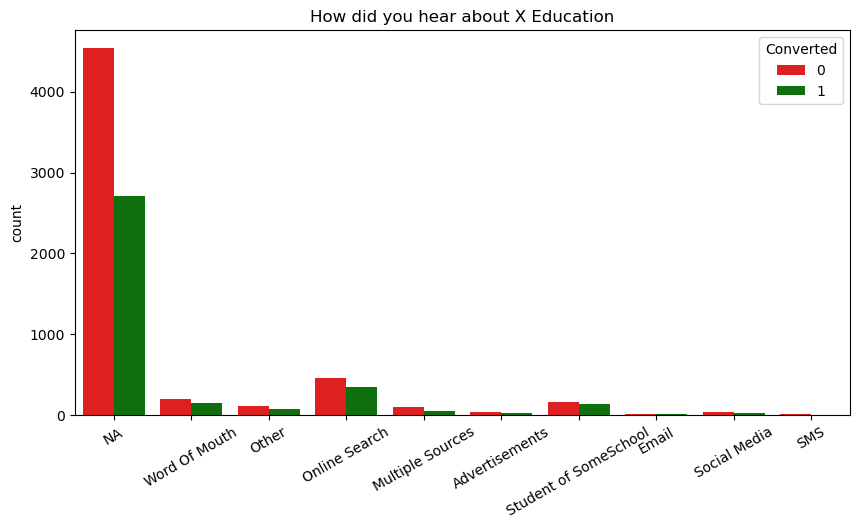

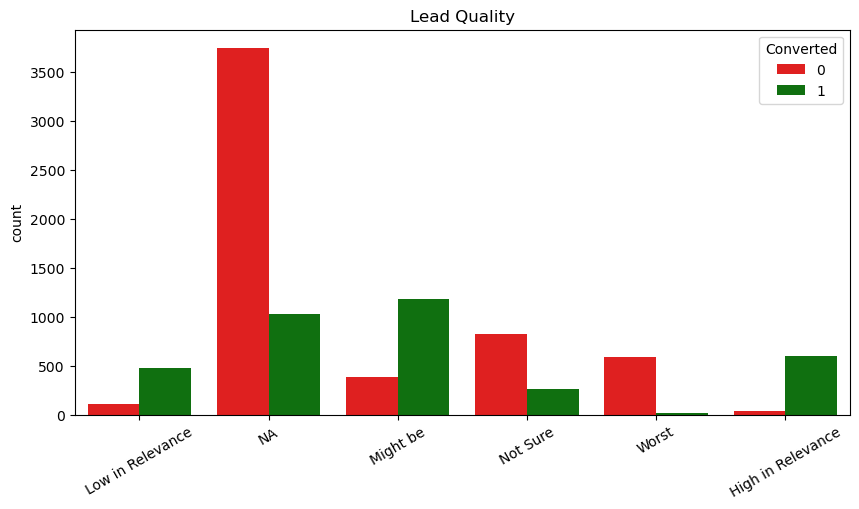

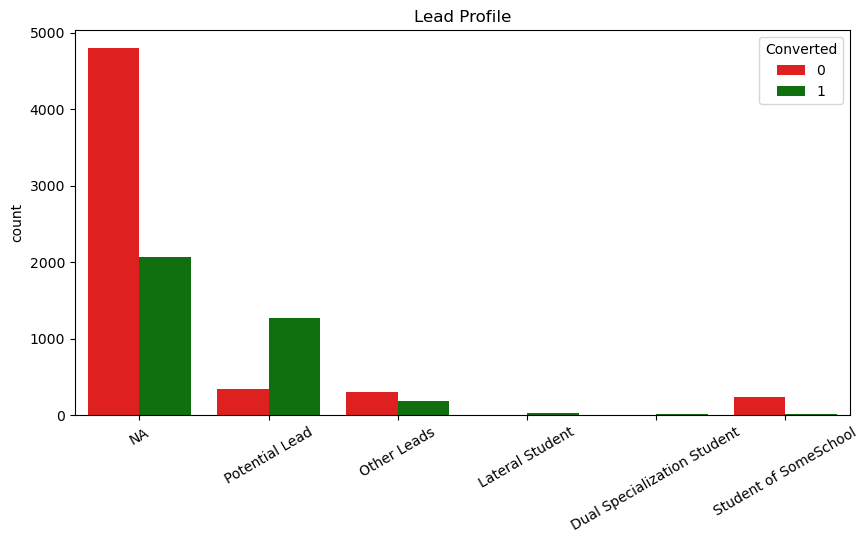

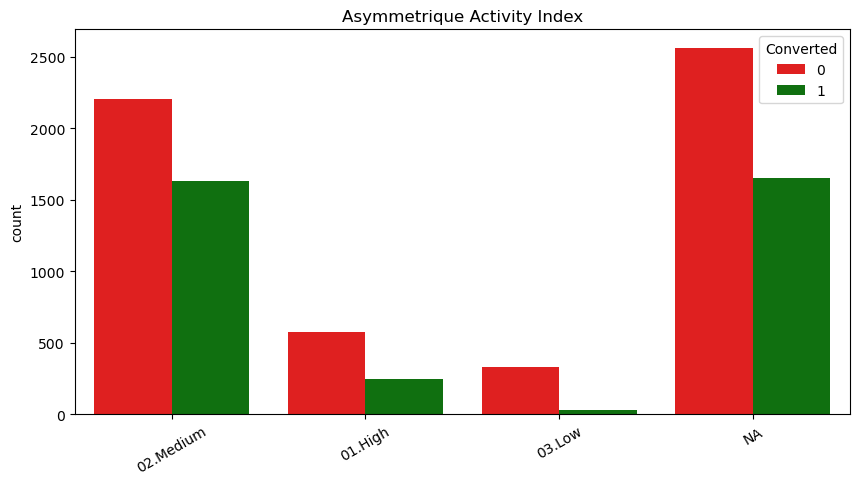

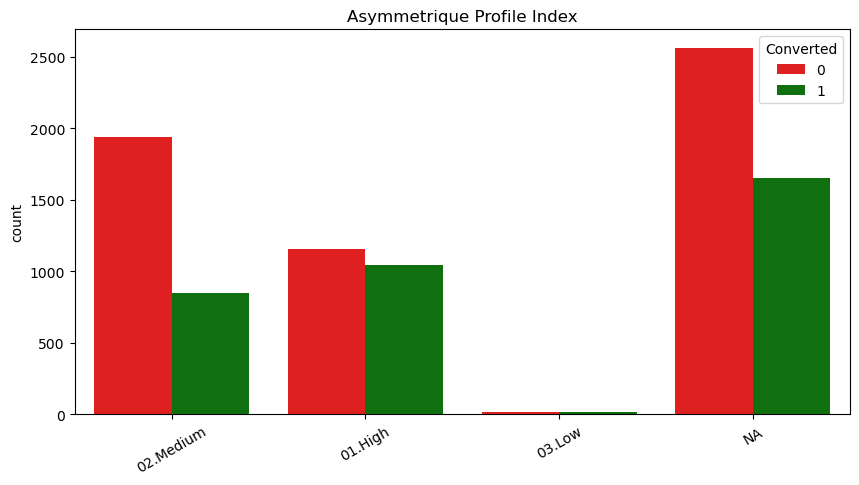

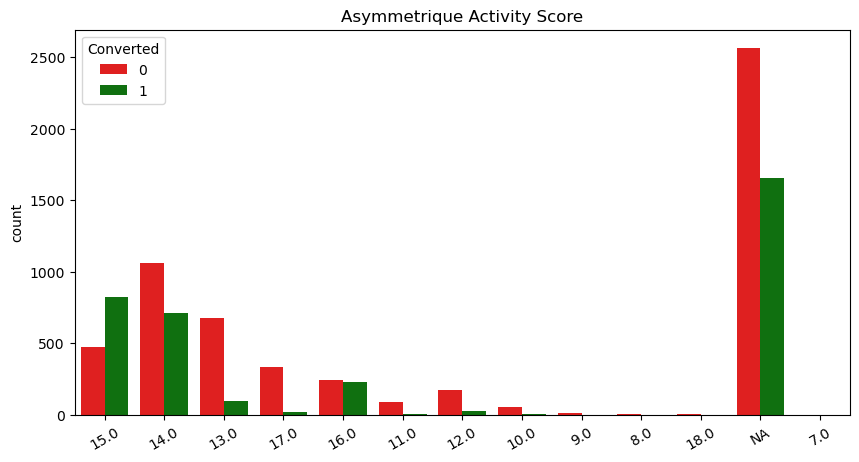

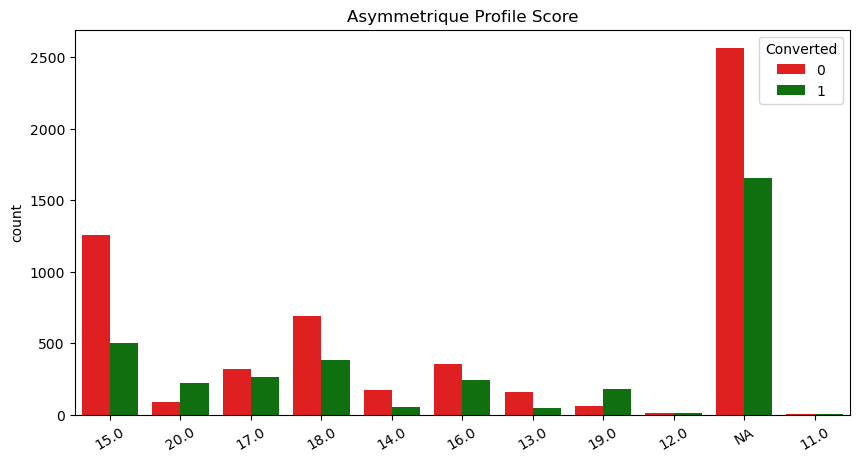

In [16]:
for i in high_NA_cols:
    plt.figure(figsize=(10,5))
    A = df[i].fillna('NA')
    sns.countplot(x=A,hue=df["Converted"],palette=["red","green"])
    plt.xticks(rotation=30)
    plt.xlabel(None)
    plt.title(i)
    plt.show()

- 'How did you hear about X Education' - almost 79% of the values are missing and from the remaining categories almost each category shows higher values belonging to not converted class. this variable won't be able to add any value to our model.

- 'Lead Quality' - only 'worst' category seems to be showing results as mentioned but that too contributes to 6.5% only, all the other categories have higher count of leads belonging to 'Converted' class. By intitution,we can categorise NA values as 'Not Sure' category, it will still result in almost 64% values in 'Not Sure' category. But, 'Not sure' category does not give us any strong opinion regarding Converted variable(majority not converted). As it is clear that the sales person or CRM team obviously not able to judge the lead quality merely by intitution, and it is our objective to provide intelligence on Lead Quality by assigning score, It's better to drop this variable to avoid any biasness.

- 'Lead Profile' - Almost 75% value are missing and from rest of the categories, only 'potential lead' category seems to be giving desired outcome. Other categories does not have much data, we will drop this variable.

- 'Asymmetrique Activity Index', 'Asymmetrique Profile Index' - Both of these variables seems to be showing similar results irrespective of the category. i.e. for activity index high/medium/low the conversion is higher for 'median' and lower for 'high', which is clearly contradicting. We will drop these variables.   

- 'Asymmetrique Activity Score'- apart from score 15, all other scores have higher number of 'not converted' class. even with score with more than 15, the 'not converted' class dominates the 'converted' class which is quite odd because the conversion percentage should improve with the score, which is not the case. Majority of the missing data holds important information which was not captured, so imputing missing data would definitely result in misinterpretation of this variable. 

- 'Asymmetrique Profile Score' - after 15 score we can see that the count of converted cases increasing wrt not converted cases, which is expected but we can see a sudden change in this trend at score 18, which negates our prediction. We will drop this variable too.

In [17]:
# let's drop these columns

df.drop(high_NA_cols,axis=1,inplace=True)

In [18]:
# check the null values again

df.isnull().sum().sort_values(ascending=False)/len(df) * 100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [19]:
# let's take a look at City,Specialization,Tags,What matters most to you in choosing a course,
# What is your current occupation and Country variables

##### City

In [20]:
df.City.value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [21]:
# let's make the null values as seperate category because of significantly high percentage.

df.City.fillna("Unspecified",inplace=True)

In [22]:
#  Excluding Mumbai, Thane & Outskirts categories, we can merge rest of the categories as 'Other Cities'

df['City'] = df.City.apply(lambda x:'Other Cities' if x not in ['Mumbai','Thane & Outskirts','Unspecified'] else x)

In [23]:
df.City.value_counts(normalize=True,dropna=False)*100

Unspecified          39.707792
Mumbai               34.870130
Other Cities         17.283550
Thane & Outskirts     8.138528
Name: City, dtype: float64

##### Specialization

In [24]:
df.Specialization.value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [25]:
# let's make the null values as seperate category because of significantly high percentage.

df.Specialization.fillna("Unspecified",inplace=True)

##### Tags

In [26]:
df.Tags.value_counts(normalize=True,dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

- "tags" variable is generated after the interaction of sales person with the prospects. as we have to build model to help sales person to identify the prospects before having any kind of contact with the lead, this variable is not relevant to our model or infact this variable will create biasness in the model. We will drop this variable

In [27]:
df.drop("Tags",axis=1,inplace=True)

##### What matters most to you in choosing a course

In [28]:
df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

As the data is highly skewed, we will drop this variable

In [29]:
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

##### What is your current occupation

In [30]:
# firstly lets change the column name to "occupation"

df.rename({'What is your current occupation':"Occupation"},axis=1,inplace=True)

In [31]:
df['Occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [32]:
# let's make the null values as seperate category because of significantly high percentage.

df.Occupation.fillna("Unspecified",inplace=True)

##### Country

In [33]:
df.Country.value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

As the data is highly skewed, mostly India, we will drop this variable

In [34]:
df.drop('Country',axis=1,inplace=True)

In [35]:
# Now that the majority of missing values have been taken care off, we will check for missing values in remaining variables.

df.isnull().sum().sort_values(ascending=False)/len(df) * 100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Lead Origin                                 0.000000
Newspaper                                   0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Magazine                                    0.000000
X Education Forums                          0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Occupation                                  0.

In [36]:
# lets check TotalVisits null values

df[df.TotalVisits.isna()]

Lead Origin       Lead Source Do Not Email Do Not Call  Converted  \
77     Lead Add Form  Welingak Website           No          No          1   
79     Lead Add Form         Reference           No          No          1   
81     Lead Add Form  Welingak Website           No          No          1   
88     Lead Add Form         Reference           No          No          1   
120    Lead Add Form         Reference           No          No          1   
133    Lead Add Form         Reference           No          No          1   
134    Lead Add Form  Welingak Website           No          No          1   
177    Lead Add Form  Welingak Website           No          No          1   
179    Lead Add Form  Welingak Website           No          No          1   
180    Lead Add Form  Welingak Website           No          No          1   
195    Lead Add Form         Reference           No          No          1   
212    Lead Add Form         Reference           No          No          1   
267    Lead Add Form         Reference           No          No          1   
269    Lead Add Form         Reference           No          No          1   
299    Lead Add Form         Reference           No          No          1   
348    Lead Add Form         Reference           No          No          1   
364    Lead Add Form         Reference           No          No          1   
369    Lead Add Form         Reference           No          No          1   
470    Lead Add Form         Reference           No          No          1   
585      Lead Import          Facebook           No          No          1   
587      Lead Import          Facebook           No          No          0   
589      Lead Import          Facebook           No          No          0   
590      Lead Import          Facebook           No          No          0   
591      Lead Import          Facebook           No          No          0   
592      Lead Import          Facebook           No          No          0   
593      Lead Import          Facebook           No          No          0   
596      Lead Import          Facebook           No          No          1   
597      Lead Import          Facebook           No          No          0   
598      Lead Import          Facebook           No          No          1   
601      Lead Import          Facebook           No          No          0   
603      Lead Import          Facebook           No          No          0   
631    Lead Add Form         Reference           No          No          1   
639    Lead Add Form         Reference          Yes          No          1   
657    Lead Add Form         Reference           No          No          1   
672              API        Olark Chat           No          No          0   
680              API        Olark Chat           No          No          0   
836    Lead Add Form               NaN          Yes          No          1   
949    Lead Add Form  Welingak Website           No          No          1   
994    Lead Add Form  Welingak Website           No          No          1   
1099   Lead Add Form         Reference           No          No          1   
1123     Lead Import          Facebook           No          No          0   
1124     Lead Import          Facebook           No          No          0   
1126     Lead Import          Facebook           No          No          0   
1127     Lead Import          Facebook           No          No          0   
1130     Lead Import          Facebook           No          No          0   
1131     Lead Import          Facebook           No          No          0   
1136     Lead Import          Facebook           No          No          0   
1137     Lead Import          Facebook           No          No          0   
1139     Lead Import          Facebook           No          No          1   
1143     Lead Import          Facebook          Yes          No          0   
1145     Lead Import          F

In [37]:
# as we can observe the lead origin as Lead add form mostly, lets check further.

df[df.TotalVisits.isna()]['Lead Origin'].value_counts()

Lead Add Form     110
Lead Import        24
API                 2
Quick Add Form      1
Name: Lead Origin, dtype: int64

- Its interesting to see that the majority of missing values from TotalVisits variable have Lead Origin as Lead Add From and Lead Import, and both these categories may signifie that the lead has been manually added by the sales person into the system from a different Source which could be the reason TotalVisits not being captured.

In [38]:
# Lets check 'Lead Add Form','Lead Import' categories

df[df['Lead Origin'].isin(['Lead Add Form','Lead Import'])].head(200)

Lead Origin       Lead Source Do Not Email Do Not Call  Converted  \
77    Lead Add Form  Welingak Website           No          No          1   
79    Lead Add Form         Reference           No          No          1   
81    Lead Add Form  Welingak Website           No          No          1   
88    Lead Add Form         Reference           No          No          1   
112   Lead Add Form         Reference           No          No          1   
120   Lead Add Form         Reference           No          No          1   
130   Lead Add Form         Reference           No          No          1   
133   Lead Add Form         Reference           No          No          1   
134   Lead Add Form  Welingak Website           No          No          1   
137   Lead Add Form         Reference           No          No          1   
174   Lead Add Form         Reference           No          No          1   
177   Lead Add Form  Welingak Website           No          No          1   
178   Lead Add Form         Reference           No          No          1   
179   Lead Add Form  Welingak Website           No          No          1   
180   Lead Add Form  Welingak Website           No          No          1   
187   Lead Add Form         Reference           No          No          1   
195   Lead Add Form         Reference           No          No          1   
205   Lead Add Form         Reference           No          No          1   
212   Lead Add Form         Reference           No          No          1   
213   Lead Add Form         Reference           No          No          1   
220   Lead Add Form         Reference           No          No          1   
260   Lead Add Form  Welingak Website           No          No          1   
262   Lead Add Form  Welingak Website           No          No          1   
267   Lead Add Form         Reference           No          No          1   
269   Lead Add Form         Reference           No          No          1   
270   Lead Add Form         Reference           No          No          1   
299   Lead Add Form         Reference           No          No          1   
335   Lead Add Form         Reference           No          No          1   
348   Lead Add Form         Reference           No          No          1   
350   Lead Add Form            Google           No          No          1   
353   Lead Add Form         Reference           No          No          1   
364   Lead Add Form         Reference           No          No          1   
369   Lead Add Form         Reference           No          No          1   
373   Lead Add Form  Welingak Website           No          No          1   
446   Lead Add Form         Reference           No          No          1   
447   Lead Add Form  Welingak Website           No          No          1   
448   Lead Add Form         Reference           No          No          1   
449   Lead Add Form  Welingak Website           No          No          1   
454   Lead Add Form         Reference           No          No          1   
460   Lead Add Form  Welingak Website           No          No          1   
470   Lead Add Form         Reference           No          No          1   
475   Lead Add Form         Reference           No          No          1   
482   Lead Add Form         Reference           No          No          1   
493   Lead Add Form         Reference           No          No          1   
507   Lead Add Form  Welingak Website           No          No          1   
513   Lead Add Form         Reference           No          No          1   
585     Lead Import          Facebook           No          No          1   
586     Lead Import          Facebook           No          No          0   
587     Lead Import          Facebook           No          No          0   
588     Lead Import          Facebook           No          No          0   
589     Lead Import          Facebook           No          No          0   
590 

- we can observe a lot of records where TotalVisits is 0 and Lead Origin is 'Lead Add Form' or 'Lead Import' and Lead source is Welingak Website, Reference, Facebook etc, and the customer is successfully Converted. So we can impute the missing values in TotalVisits variable as 0, but still let's take a look where TotalVisits is 0.

In [39]:
df[(df.TotalVisits==0.0) & (df['Lead Origin'].isin(['Lead Add Form','Lead Import']))].head(200)

Lead Origin       Lead Source Do Not Email Do Not Call  Converted  \
112   Lead Add Form         Reference           No          No          1   
130   Lead Add Form         Reference           No          No          1   
137   Lead Add Form         Reference           No          No          1   
174   Lead Add Form         Reference           No          No          1   
178   Lead Add Form         Reference           No          No          1   
187   Lead Add Form         Reference           No          No          1   
205   Lead Add Form         Reference           No          No          1   
213   Lead Add Form         Reference           No          No          1   
220   Lead Add Form         Reference           No          No          1   
260   Lead Add Form  Welingak Website           No          No          1   
262   Lead Add Form  Welingak Website           No          No          1   
270   Lead Add Form         Reference           No          No          1   
335   Lead Add Form         Reference           No          No          1   
350   Lead Add Form            Google           No          No          1   
353   Lead Add Form         Reference           No          No          1   
373   Lead Add Form  Welingak Website           No          No          1   
446   Lead Add Form         Reference           No          No          1   
447   Lead Add Form  Welingak Website           No          No          1   
448   Lead Add Form         Reference           No          No          1   
449   Lead Add Form  Welingak Website           No          No          1   
460   Lead Add Form  Welingak Website           No          No          1   
475   Lead Add Form         Reference           No          No          1   
482   Lead Add Form         Reference           No          No          1   
493   Lead Add Form         Reference           No          No          1   
507   Lead Add Form  Welingak Website           No          No          1   
513   Lead Add Form         Reference           No          No          1   
586     Lead Import          Facebook           No          No          0   
588     Lead Import          Facebook           No          No          0   
594     Lead Import          Facebook           No          No          0   
595     Lead Import          Facebook           No          No          0   
599     Lead Import          Facebook           No          No          0   
600     Lead Import          Facebook           No          No          1   
602     Lead Import          Facebook           No          No          0   
607   Lead Add Form  Welingak Website           No          No          1   
623   Lead Add Form         Reference           No          No          1   
650   Lead Add Form         Reference           No          No          1   
662   Lead Add Form         Reference           No          No          1   
667   Lead Add Form         Reference           No          No          1   
737   Lead Add Form  Welingak Website           No          No          1   
746   Lead Add Form         Reference           No          No          0   
802   Lead Add Form  Welingak Website           No          No          1   
807   Lead Add Form         Reference           No          No          1   
808   Lead Add Form         Reference           No          No          1   
809   Lead Add Form         Reference           No          No          0   
810   Lead Add Form         Reference           No          No          1   
822   Lead Add Form  Welingak Website           No          No          1   
839   Lead Add Form         Reference           No          No          1   
841   Lead Add Form         Reference           No          No          1   
846   Lead Add Form         Reference           No          No          1   
918   Lead Add Form  Welingak Website          Yes          No          1   
941   Lead Add Form         Reference           No          No          1   
983 

- As we can see that almost all the records with Lead Origin as in TotalVisits variable are 0. so lets impute with 0.

In [40]:
df.TotalVisits.fillna(0,inplace=True)

In [41]:
# Also, Page Views Per Visit is dependent on TotalVisits variable, which also have same records missing, 
# we will also impute them with 0

In [42]:
df['Page Views Per Visit'].fillna(0,inplace=True)

In [43]:
# let's check for null values

df.isnull().sum().sort_values(ascending=False)/len(df) * 100

Last Activity                               1.114719
Lead Source                                 0.389610
Lead Origin                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Occupation                                  0.000000
Specialization                              0.000000
Page Views Per Visit                        0.

In [44]:
# Lets check Last Activity variable

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
df[df['Last Activity'].isna()]

Lead Origin       Lead Source Do Not Email Do Not Call  Converted  \
77    Lead Add Form  Welingak Website           No          No          1   
79    Lead Add Form         Reference           No          No          1   
81    Lead Add Form  Welingak Website           No          No          1   
88    Lead Add Form         Reference           No          No          1   
120   Lead Add Form         Reference           No          No          1   
133   Lead Add Form         Reference           No          No          1   
134   Lead Add Form  Welingak Website           No          No          1   
177   Lead Add Form  Welingak Website           No          No          1   
179   Lead Add Form  Welingak Website           No          No          1   
180   Lead Add Form  Welingak Website           No          No          1   
212   Lead Add Form         Reference           No          No          1   
267   Lead Add Form         Reference           No          No          1   
269   Lead Add Form         Reference           No          No          1   
299   Lead Add Form         Reference           No          No          1   
348   Lead Add Form         Reference           No          No          1   
364   Lead Add Form         Reference           No          No          1   
369   Lead Add Form         Reference           No          No          1   
470   Lead Add Form         Reference           No          No          1   
585     Lead Import          Facebook           No          No          1   
587     Lead Import          Facebook           No          No          0   
589     Lead Import          Facebook           No          No          0   
590     Lead Import          Facebook           No          No          0   
591     Lead Import          Facebook           No          No          0   
592     Lead Import          Facebook           No          No          0   
593     Lead Import          Facebook           No          No          0   
596     Lead Import          Facebook           No          No          1   
597     Lead Import          Facebook           No          No          0   
598     Lead Import          Facebook           No          No          1   
601     Lead Import          Facebook           No          No          0   
603     Lead Import          Facebook           No          No          0   
631   Lead Add Form         Reference           No          No          1   
949   Lead Add Form  Welingak Website           No          No          1   
994   Lead Add Form  Welingak Website           No          No          1   
1099  Lead Add Form         Reference           No          No          1   
1136    Lead Import          Facebook           No          No          0   
1137    Lead Import          Facebook           No          No          0   
1145    Lead Import          Facebook           No          No          0   
1249  Lead Add Form         Reference           No          No          1   
1258  Lead Add Form         Reference           No          No          0   
1393  Lead Add Form  Welingak Website           No          No          1   
1395  Lead Add Form         Reference           No          No          1   
1548  Lead Add Form         Reference           No          No          1   
1574  Lead Add Form         Reference           No          No          1   
1634    Lead Import          Facebook           No          No          0   
2001  Lead Add Form         Reference           No          No          1   
2070  Lead Add Form         Reference           No          No          1   
2134  Lead Add Form         Reference           No          No          1   
2656  Lead Add Form         Reference           No          No          1   
2786  Lead Add Form         Reference           No          No          1   
2921  Lead Add Form         Reference           No          No          1   
2924  Lead Add Form         Reference           No          No          1   
2925

- Again, most of the missing values in Last Activity variable is due to Lead Origin as Lead Add Form and Lead Import
- Also Last Activity and Last Notable Activity signifies similar things. On the other hand, Last Notable Activity puts more emphasis on some noteworthy activity, which does not have any missing values too.
- So we will drop the Last Activity variable

In [46]:
df.drop('Last Activity',axis=1,inplace=True)

In [47]:
# Lastly lets check Lead Source variable

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
df["Lead Source"]=='google'

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Name: Lead Source, Length: 9240, dtype: bool

In [49]:
# We can see, Google is contributing highest to the Lead Source
# Also, there are another records with 'google'. firstly, we will correct them and then check the missing values.

df.loc[(df["Lead Source"]=='google'),'Lead Source'] = 'Google'

In [50]:
df[df['Lead Source'].isna()]

Lead Origin Lead Source Do Not Email Do Not Call  Converted  \
836             Lead Add Form         NaN          Yes          No          1   
1569            Lead Add Form         NaN           No          No          1   
1746            Lead Add Form         NaN           No          No          1   
2020            Lead Add Form         NaN           No          No          1   
2025            Lead Add Form         NaN           No          No          1   
2152            Lead Add Form         NaN           No          No          1   
2346            Lead Add Form         NaN          Yes          No          1   
2544              Lead Import         NaN           No          No          0   
2601           Quick Add Form         NaN          Yes          No          1   
2676            Lead Add Form         NaN           No          No          1   
3028            Lead Add Form         NaN           No          No          1   
3266  Landing Page Submission         NaN           No          No          1   
3268            Lead Add Form         NaN           No          No          1   
3928            Lead Add Form         NaN          Yes          No          0   
3945            Lead Add Form         NaN          Yes          No          1   
4406            Lead Add Form         NaN           No          No          1   
4409            Lead Add Form         NaN           No          No          0   
4605            Lead Add Form         NaN          Yes          No          0   
4653            Lead Add Form         NaN          Yes          No          1   
4804            Lead Add Form         NaN           No          No          1   
4831            Lead Add Form         NaN           No          No          1   
4843            Lead Add Form         NaN           No          No          1   
5253            Lead Add Form         NaN          Yes          No          1   
5621            Lead Add Form         NaN           No          No          1   
5840            Lead Add Form         NaN           No          No          1   
5960            Lead Add Form         NaN          Yes          No          1   
6124            Lead Add Form         NaN           No          No          1   
7302            Lead Add Form         NaN          Yes          No          0   
7306            Lead Add Form         NaN          Yes          No          1   
7525            Lead Add Form         NaN          Yes          No          1   
7847            Lead Add Form         NaN           No          No          0   
8092            Lead Add Form         NaN           No          No          1   
8118            Lead Add Form         NaN           No          No          1   
8276            Lead Add Form         NaN           No          No          1   
8490            Lead Add Form         NaN           No          No          0   
9160            Lead Add Form         NaN          Yes          No          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
836           0.0                         1378                   0.0   
1569          0.0                            0                   0.0   
1746          0.0                            0                   0.0   
2020          0.0                            0                   0.0   
2025          0.0                            0                   0.0   
2152          0.0                            0                   0.0   
2346          0.0                            0                   0.0   
2544          0.0                            0                   0.0   
2601          0.0                         2217                   0.0   
2676          0.0                            0                   0.0   
3028          0.0                            0                   0.0   
3266          2.0                            9                   2.0   
3268          0.0                            0                   0.0   
3928        

- Majority of missing values have lead origin as Lead Add Form, we will check which Lead Source has the highest contribution when Lead Origin is Lead Add Form, and impute missing values with it.

In [51]:
df[df['Lead Origin']=='Lead Add Form']['Lead Source'].value_counts()

Reference           534
Welingak Website    142
Click2call            4
Olark Chat            2
Live Chat             2
Google                1
Name: Lead Source, dtype: int64

In [52]:
# as we can see, 'Reference' Lead Source occures highest when Lead Origin is Lead Add Form, 
# we will impute missing values with 'Reference' category

df.loc[df['Lead Source'].isna(),'Lead Source'] = 'Reference'

#### Now that we have taken care of missing values, let's check categorical variables with high number of categories and try to reduce them.

### 2.2 Data Cleaning - Categorical Variable 

In [53]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Specialization', 'Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
for i in categorical_columns:
    print(f"Number of unique categories in {i} :",df[i].nunique())

Number of unique categories in Lead Origin : 5
Number of unique categories in Lead Source : 20
Number of unique categories in Do Not Email : 2
Number of unique categories in Do Not Call : 2
Number of unique categories in Specialization : 19
Number of unique categories in Occupation : 7
Number of unique categories in Search : 2
Number of unique categories in Magazine : 1
Number of unique categories in Newspaper Article : 2
Number of unique categories in X Education Forums : 2
Number of unique categories in Newspaper : 2
Number of unique categories in Digital Advertisement : 2
Number of unique categories in Through Recommendations : 2
Number of unique categories in Receive More Updates About Our Courses : 1
Number of unique categories in Update me on Supply Chain Content : 1
Number of unique categories in Get updates on DM Content : 1
Number of unique categories in City : 4
Number of unique categories in I agree to pay the amount through cheque : 1
Number of unique categories in A free c

In [55]:
# Lets first check Lead Source category

df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             570
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [56]:
# Let's merge all categories with 6 and less records into Others Category

req_cate = ['bing', 'Click2call','Social Media', 'Live Chat', 'Press_Release', 
'Pay per Click Ads','blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'testone','NC_EDM']

df.loc[df['Lead Source'].isin(req_cate),'Lead Source'] = 'Others'

In [57]:
# Also, lets check if Referral Sites and Reference categories shows similar class imbalance, so that we can merge 
# both the categories

print('Referral Sites: \n',df[df['Lead Source']=='Referral Sites'].Converted.value_counts(normalize=True)*100)
print('\nReference: \n',df[df['Lead Source']=='Reference'].Converted.value_counts(normalize=True)*100)

Referral Sites: 
 0    75.2
1    24.8
Name: Converted, dtype: float64

Reference: 
 1    91.052632
0     8.947368
Name: Converted, dtype: float64


- Both the categories, although signifies reference, have different conversion ratios. Lets move ahead to next variable

In [58]:
# Lets check Last Notable Activity 

LNA = pd.DataFrame(df["Last Notable Activity"].value_counts().sort_index())
LNA["Converted"] = df.groupby("Last Notable Activity",dropna=False).Converted.sum().sort_index().values
LNA["Not Converted"] = LNA['Last Notable Activity'] - LNA['Converted']
LNA.sort_values("Last Notable Activity",inplace=True,ascending=False)
LNA.reset_index(names="LNA Name",inplace=True)
LNA

LNA Name  Last Notable Activity  Converted  \
0                       Modified                   3407        783   
1                   Email Opened                   2827       1044   
2                       SMS Sent                   2172       1508   
3        Page Visited on Website                    318         93   
4        Olark Chat Conversation                    183         25   
5             Email Link Clicked                    173         45   
6                  Email Bounced                     60          9   
7                   Unsubscribed                     47         14   
8                    Unreachable                     32         22   
9       Had a Phone Conversation                     14         13   
10             Email Marked Spam                      2          2   
11            Approached upfront                      1          1   
12                Email Received                      1          1   
13     Form Submitted on Website                      1          0   
14        Resubscribed to emails                      1          1   
15  View in browser link Clicked                      1          0   

    Not Converted  
0            2624  
1            1783  
2             664  
3             225  
4             158  
5             128  
6              51  
7              33  
8              10  
9               1  
10              0  
11              0  
12              0  
13              1  
14              0  
15              1

In [59]:
# Let's group categories with less records together into 'Others'

req_cate = ['Email Marked Spam', 'Approached upfront', 'Email Received','Form Submitted on Website', 
           'Resubscribed to emails','View in browser link Clicked']

df.loc[df['Last Notable Activity'].isin(req_cate),'Last Notable Activity'] = 'Others'

In [60]:
# Specialization

df.Specialization.value_counts(normalize=True)*100

Unspecified                          36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [61]:
# we will Categorise the Specialization into Management, Business and Others.

df.Specialization = df.Specialization.map(lambda x: "Management" if "Management" in str(x) else x)
df.Specialization = df.Specialization.map(lambda x:"Business" if "business" in str(x).lower() else x)
df.Specialization = df.Specialization.map(lambda x:"Others" if str(x) not in ["Management","Business","Unspecified"] else x)

In [62]:
# Occupation

df.Occupation.value_counts(normalize=True)*100

Unemployed              60.606061
Unspecified             29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [63]:
# we will merge Housewife and businessman with other category.

df['Occupation'] = df.Occupation.apply(lambda x:"Other" if x in ['Businessman','Housewife'] else x)

In [64]:
# Now Let's check for the variables with only 1 category and 2 categories

single_cate_cols = [i for i in categorical_columns if df[i].nunique()==1]
two_cate_cols = [i for i in categorical_columns if df[i].nunique()==2]

In [65]:
#  we will straight away drop single category variables

df.drop(single_cate_cols,axis=1,inplace=True)

In [66]:
# Lets check values of 2 category variables

for i in two_cate_cols:
    print(df[i].value_counts(normalize=True)*100,"\n")

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64 

No     99.848485
Yes     0.151515
Name: Search, dtype: float64 

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64 

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64 

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64 

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64 

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64 

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64 



- Apart from 'A free copy of Mastering The Interview','Do Not Email' variables, every other category is very highly skewed. It will not give any valuable contribution to training our model.

In [67]:
# Lets drop highly skewed variables

two_cate_cols.remove('A free copy of Mastering The Interview')
two_cate_cols.remove('Do Not Email')

df.drop(two_cate_cols,axis=1,inplace=True)

In [68]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

  Specialization  Occupation         City  \
0    Unspecified  Unemployed  Unspecified   
1    Unspecified  Unemployed  Unspecified   
2       Business     Student       Mumbai   
3         Others  Unemployed       Mumbai   
4    Unspecified  Unemployed       Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

# 3. EDA

## 3.1 EDA- Numerical Variables

In [69]:
numerical_cols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

In [70]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalVisits                  9240 non-null   float64
 1   Total Time Spent on Website  9240 non-null   int64  
 2   Page Views Per Visit         9240 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 216.7 KB


In [71]:
df[numerical_cols].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
0%        0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

Note: Looking at the max value, we can roughly say that there might be presence of outliers, we will check that by plotting box plots.

In [72]:
# firstly we will check for correlation and then check for outliers.

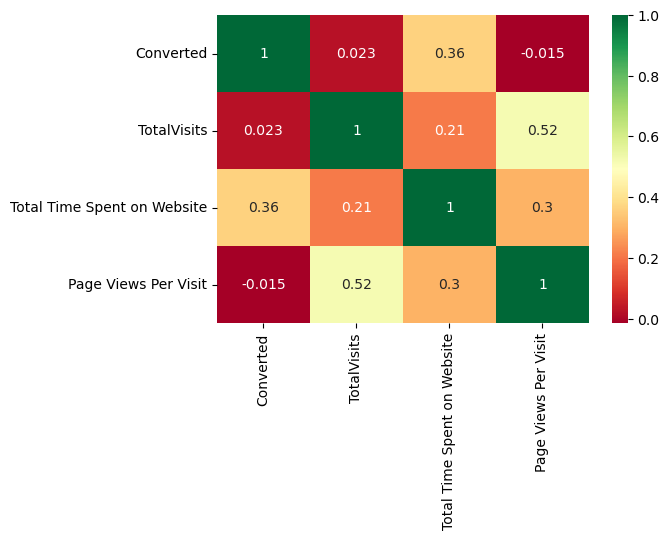

In [73]:
corr = df[['Converted','TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr,cmap="RdYlGn",annot=True)
plt.show()

Note:
- no significant correlation present between numerical variables

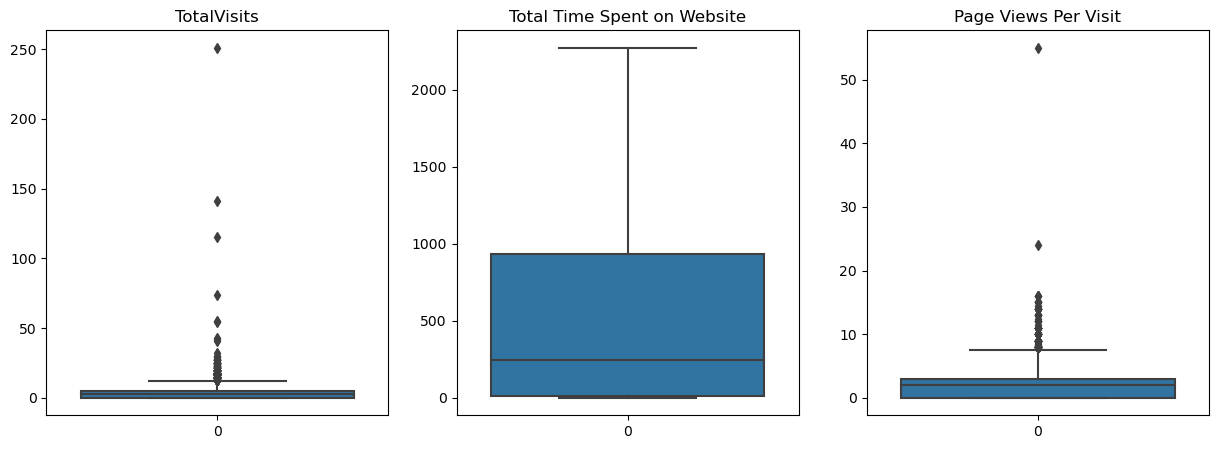

In [74]:
# lets check for outliers

plt.figure(figsize=(15,5))
for i,j in enumerate(numerical_cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(df[j])
    plt.title(j)
plt.show()

Note: Total views, Page views per visit contains outliers. but, the outlier values are actually fisible which shows natural variation in our data. For now, Lets keep than as it is, we will handle outliers before model building.

## 3.2 EDA - Categorical Variables

In [75]:
categorical_columns = df.select_dtypes(include="object").columns
print(categorical_columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'Occupation', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')


In [76]:
# firstly lets check the category wise distribution of each variable

In [77]:
def Univariate_categorical(var):
    sns.countplot(x=df[var])
    plt.xlabel(None)
    plt.title(var)
    plt.xticks(rotation=12)

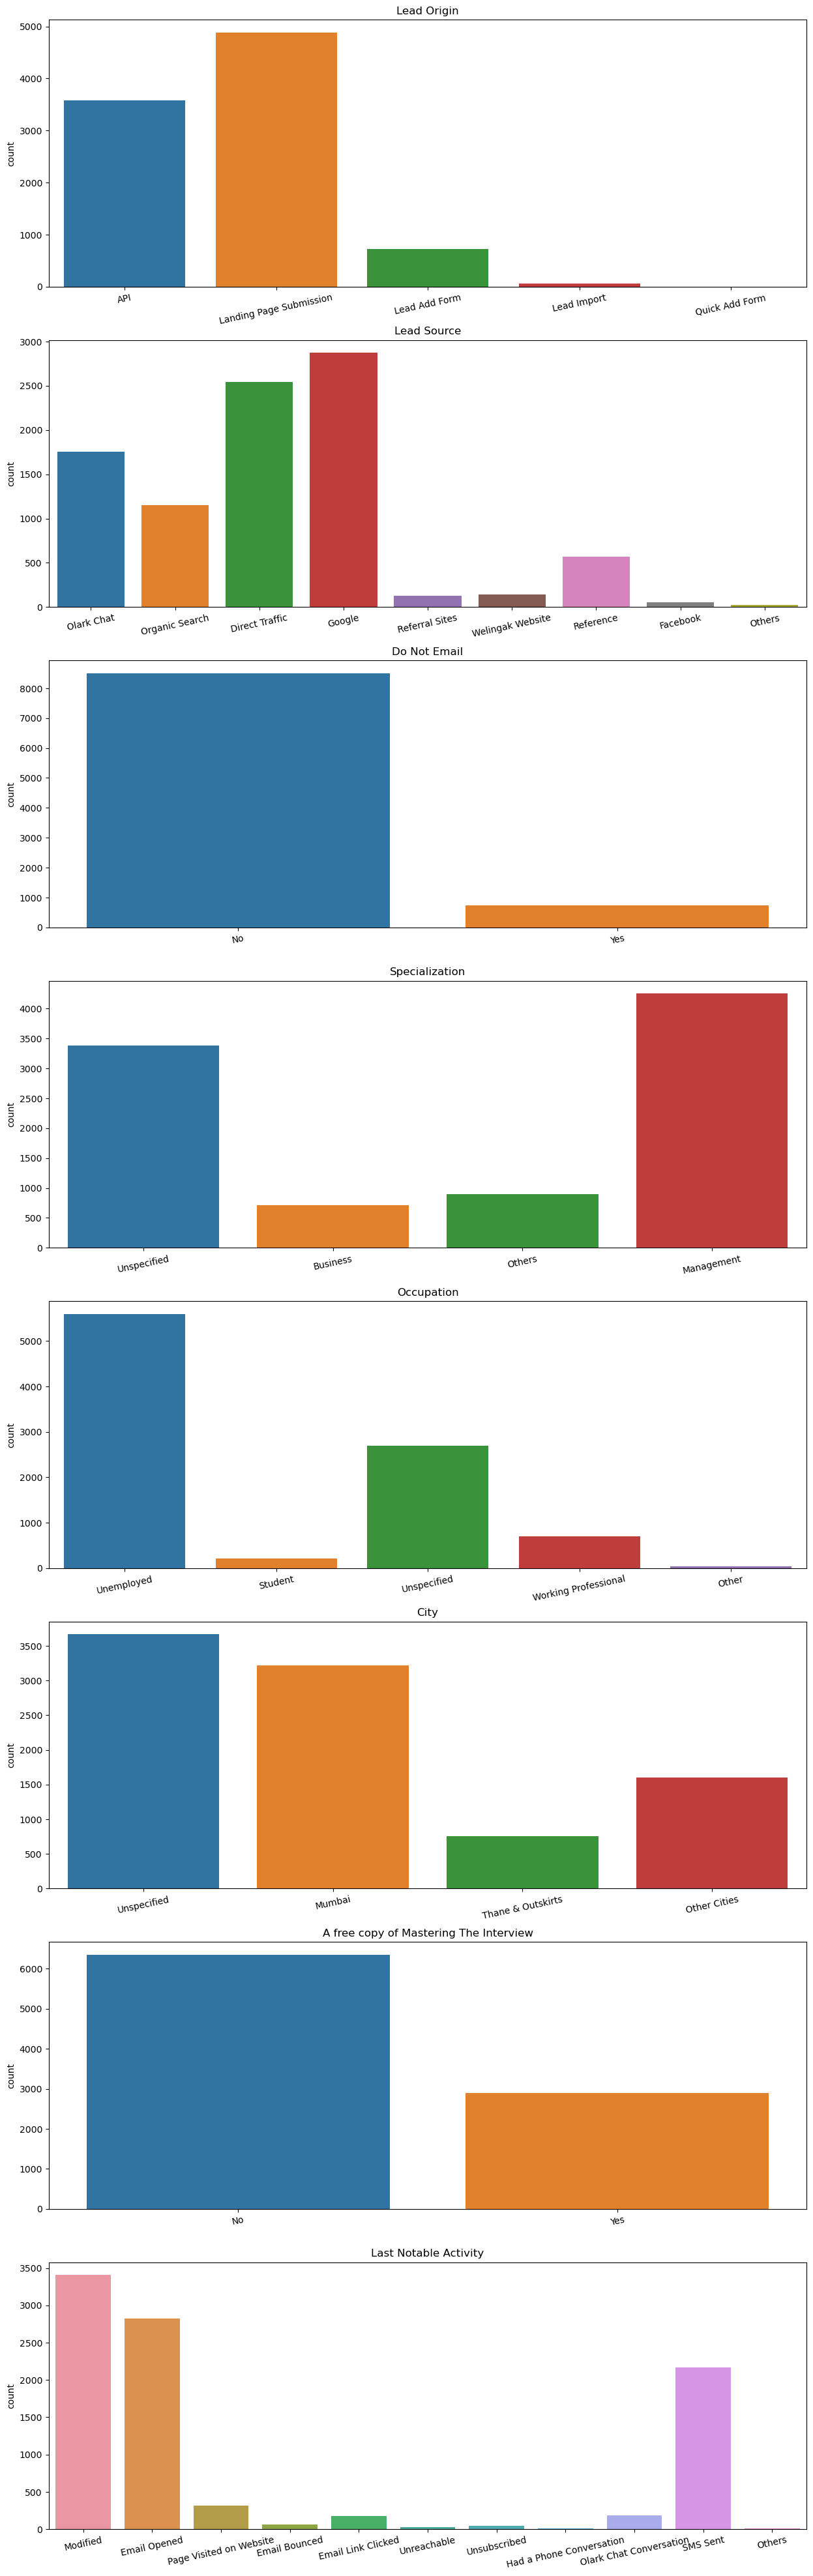

In [78]:
plt.figure(figsize=(15,50))
for i,j in enumerate(categorical_columns,1):
    plt.subplot(8,1,i)
    Univariate_categorical(j)
plt.show()

In [79]:
# Insightes from above graphs
# 1- Lead Origin - Maximum Leads are generated from Landing Page Submission
# 2- Lead Source - Major source of lead is Google
# 3- Do Not Email - Majority of customers do not want to receive E-mails.
# 4- Specialization - Most of the enquiries are for management specialization.
# 5- occupation - Most of the people whoenquire about our courses are Unemployed.
# 6- City- Although a lot people do not want to fill City, most of them are from Mumbai.
# 7- A free copy of Mastering The Interview - Majority do not want 'a free copy of mastering interview'.
# 8- Last Notable Activity - Most of the customers have 'Modified' or 'Email Opened' or 'SMS Sent' 
#                             as their Last Notable Activity .

In [80]:
# lets check categorical variables wrt the target variable(Converted)

In [81]:
def Bivariate_categorical(var):
    sns.countplot(x=df[var],hue=df.Converted,palette=['r','g'])
    plt.xlabel(None)
    plt.title(var)
    plt.xticks(rotation=12)

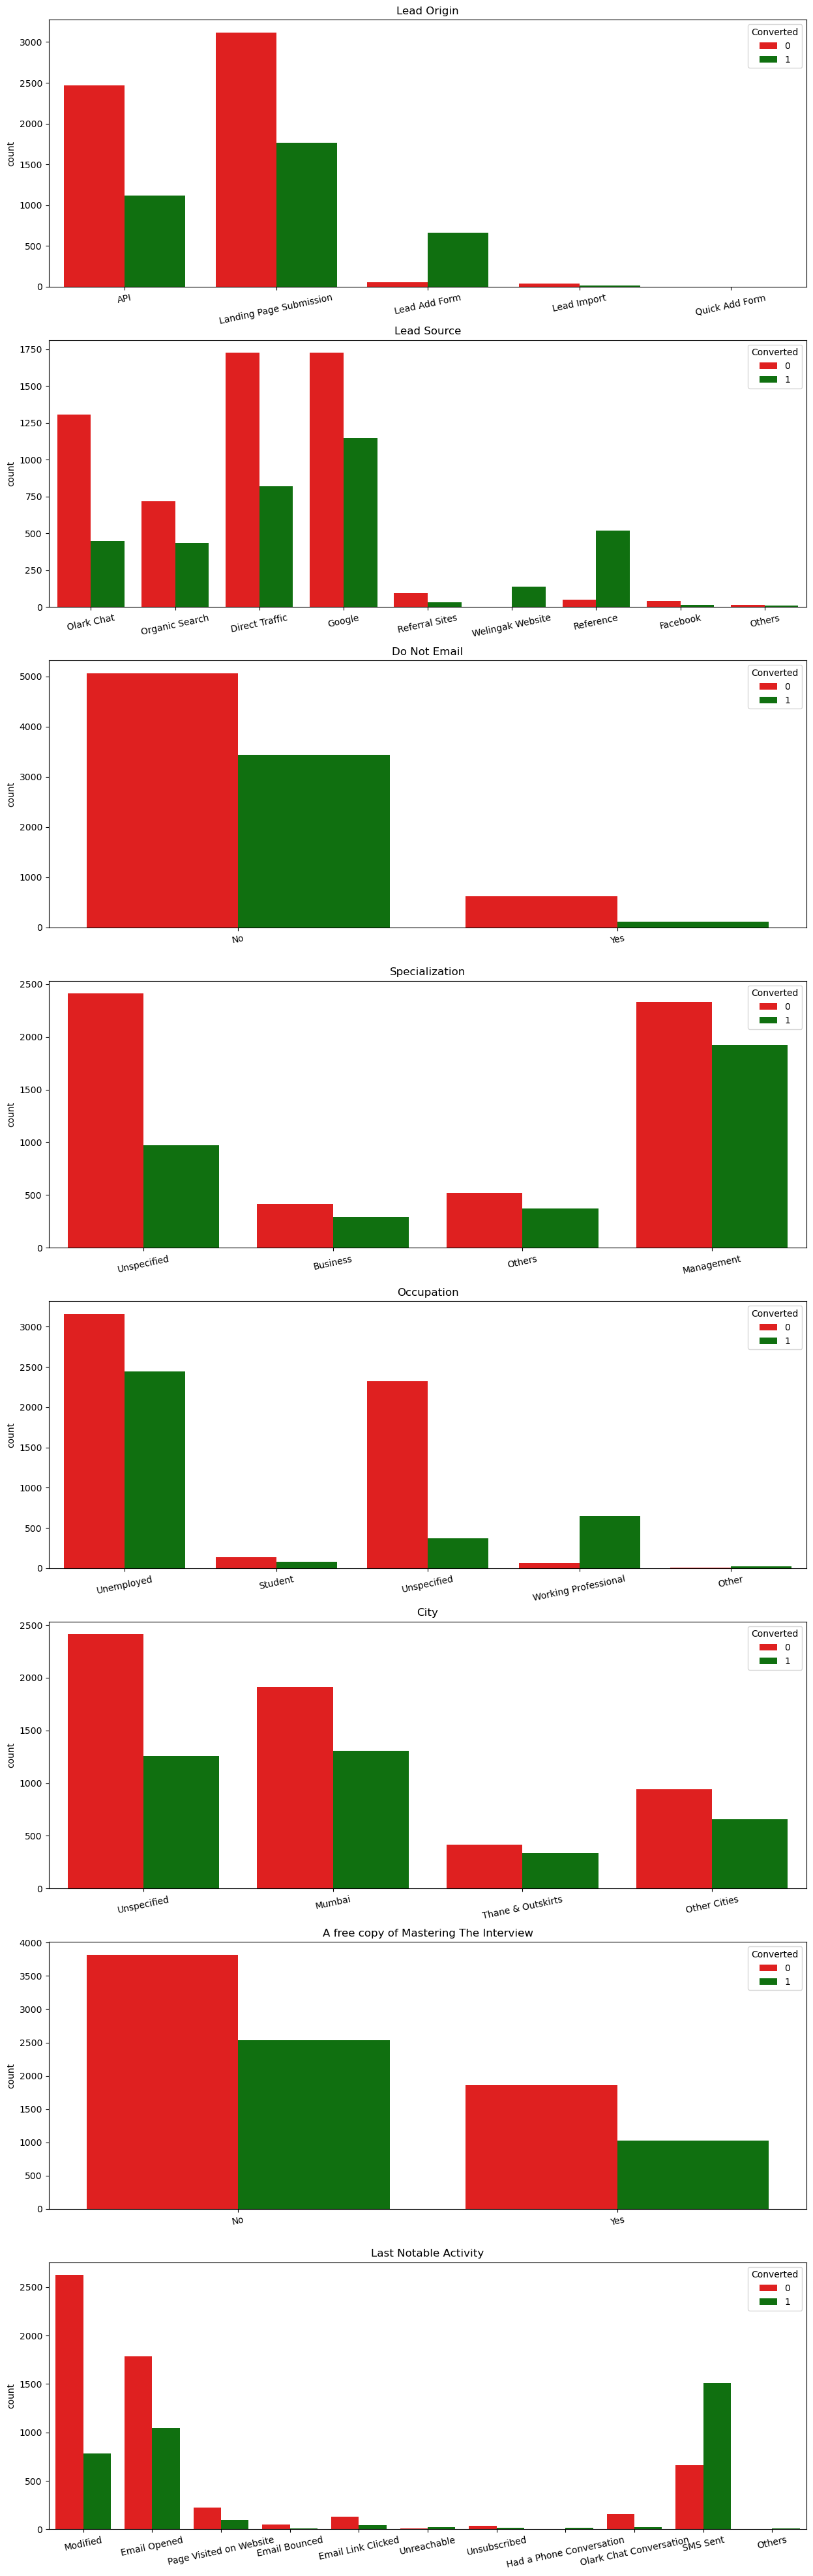

In [82]:
plt.figure(figsize=(15,50))
for i,j in enumerate(categorical_columns,1):
    plt.subplot(8,1,i)
    Bivariate_categorical(j)
plt.show()

Note:
- "Lead Origin"- although "Landing page submission" and "API" have higher contribution, "Lead Add Form" have higher percentage of conversion.
- "Lead Source"- "direct traffic" & "Google" have highest contribution but "reference" and 'welingak website' ensures the conversion in most of the cases. 
- "Do not email"- we can say that those who agree to not receive email have slightly lower conversion rate.
- "Specialization" - Most of the clients opt for management specialization.
- "Occupation" - a lot of clients are unemployed but there is quite high chance of conversion if client is employed(working professional).
- "City" - although most of the people are from mumbai, but the conversion rate is quite similar for non-mumbai or other cities.
- 'A free copy of Mastering The Interview' - although most of the people do not want a free copy, the variable does not seem to have any significant impact on the conversion rate.
- 'Last Notable Activity' - If the Last notable activity is 'SMS Sent' then there is high chance of conversion. also, Modified and email opened categories have good number of conversions but not converted lead count is still higher.

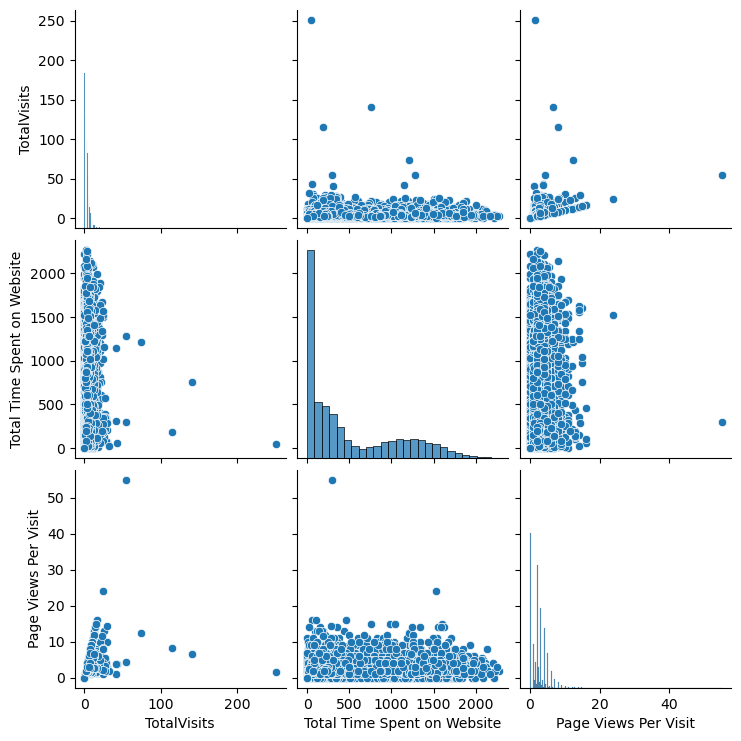

In [83]:
sns.pairplot(data=df[numerical_cols])
plt.show()

- TotalVisits and Page Views per Visits shows positive correlation but its very weak
- Page Views per Visits and Total time spent on website also shows positive correlation.
- We may encounter multi-collinearity during model building, which we will handle using variance inflation factor

In [84]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

  Specialization  Occupation         City  \
0    Unspecified  Unemployed  Unspecified   
1    Unspecified  Unemployed  Unspecified   
2       Business     Student       Mumbai   
3         Others  Unemployed       Mumbai   
4    Unspecified  Unemployed       Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

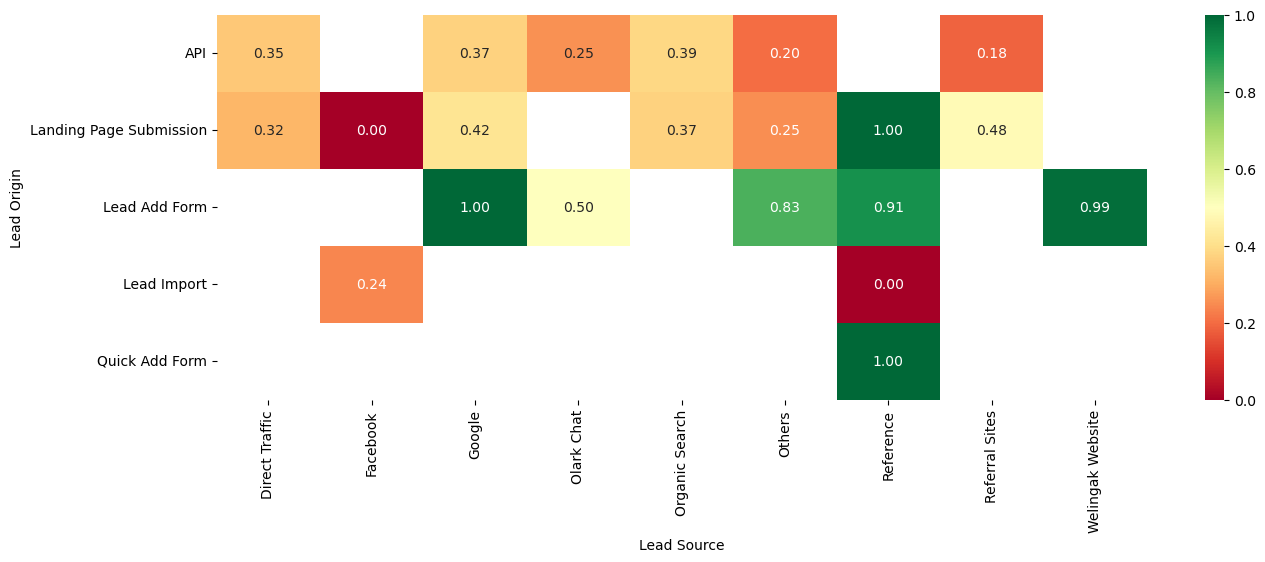

In [85]:
def MultiVar_HeatMap(idx,clm,val='Converted'):
    plt.figure(figsize=(15,5))
    sns.heatmap(df.pivot_table(index=idx,columns=clm,values=val,aggfunc=np.mean),
            annot=True,cmap='RdYlGn',fmt='0.2f')
    plt.show()


MultiVar_HeatMap(idx='Lead Origin',clm='Lead Source')

- we can see some of the combinations of Lead Origin and Lead Source giving much better results than others.
- A Lead with Origin as 'Landing Page Submission' or 'Lead Add Form' with source as 'Reference has good chance of conversion
- A Lead with Origin as 'Lead Add Form' with source as 'Google' has good chance of conversion.

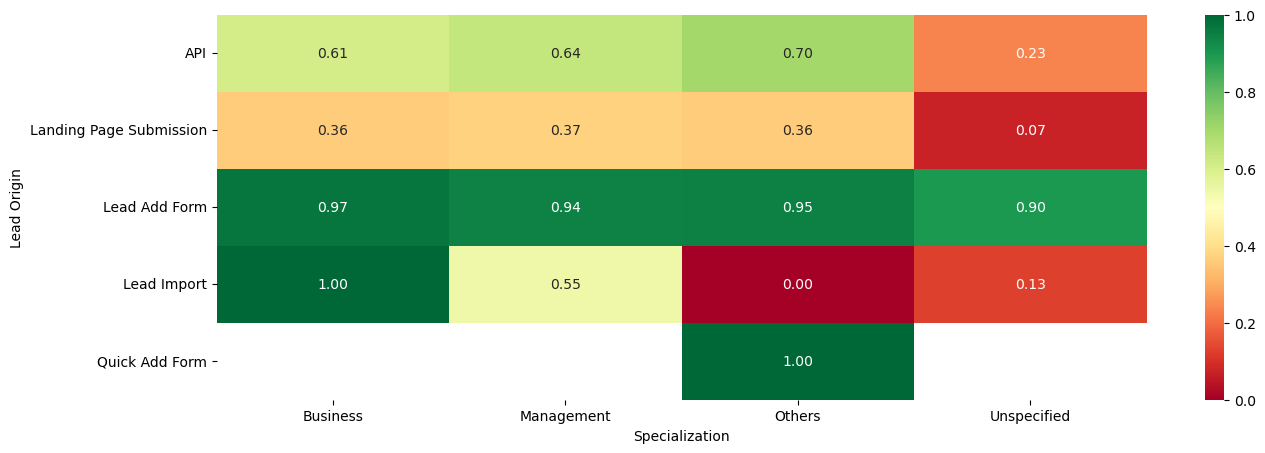

In [86]:
MultiVar_HeatMap(idx='Lead Origin',clm='Specialization')

For any specialization :
- If the Lead origin is 'Lead Add Form' then the conversion chances are higher.

Customer with 'Busisess' Specialization and lead origin as 'Lead Import' have high chances of conversion.

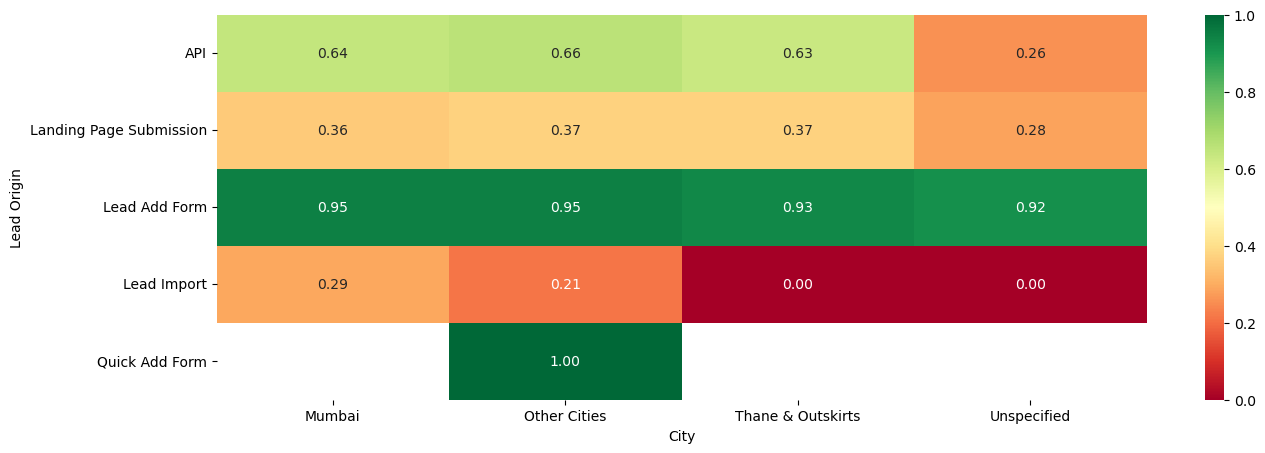

In [87]:
MultiVar_HeatMap(idx='Lead Origin',clm='City')

For any City :
- If the Lead origin is 'Lead Add Form' then the conversion chances are higher.
- Lead Origin 'API' also has good chances of conversion across any city except if city is 'Unspecified'
- If City is not mentioned then its better to not prioritize that lead unless from  Lead origin 'Lead Add Form'

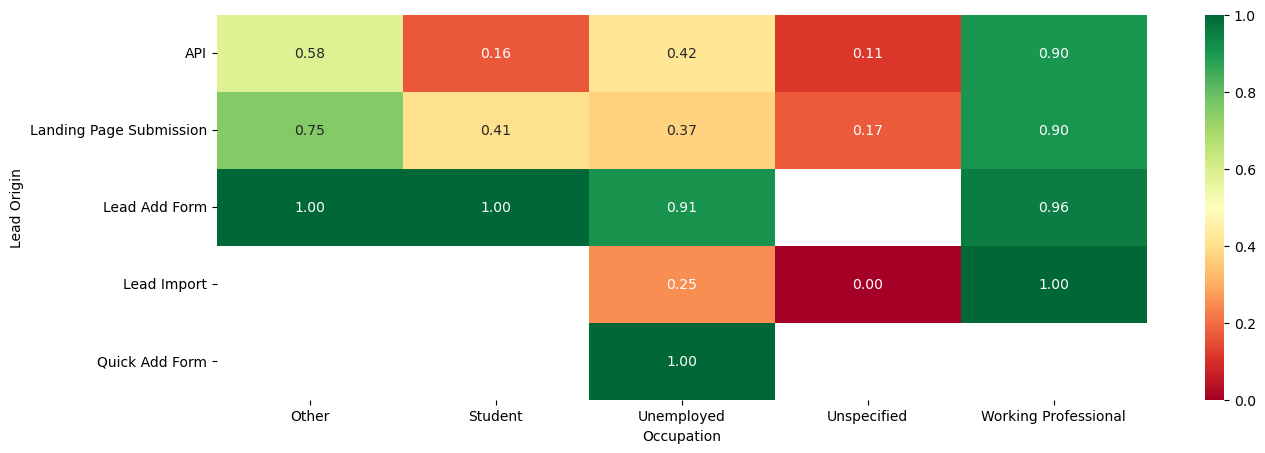

In [88]:
MultiVar_HeatMap(idx='Lead Origin',clm='Occupation')

- Majority of conversions happen when Lead origin is 'Lead Add Form','Landing Page Submission' or 'API' across all 'Occupation' except 'Unspecified'.
- Leads in which Occupation is 'Unspecified', should be our last priority.
- Working professionals have highest conversion ratio across all the Lead Origin

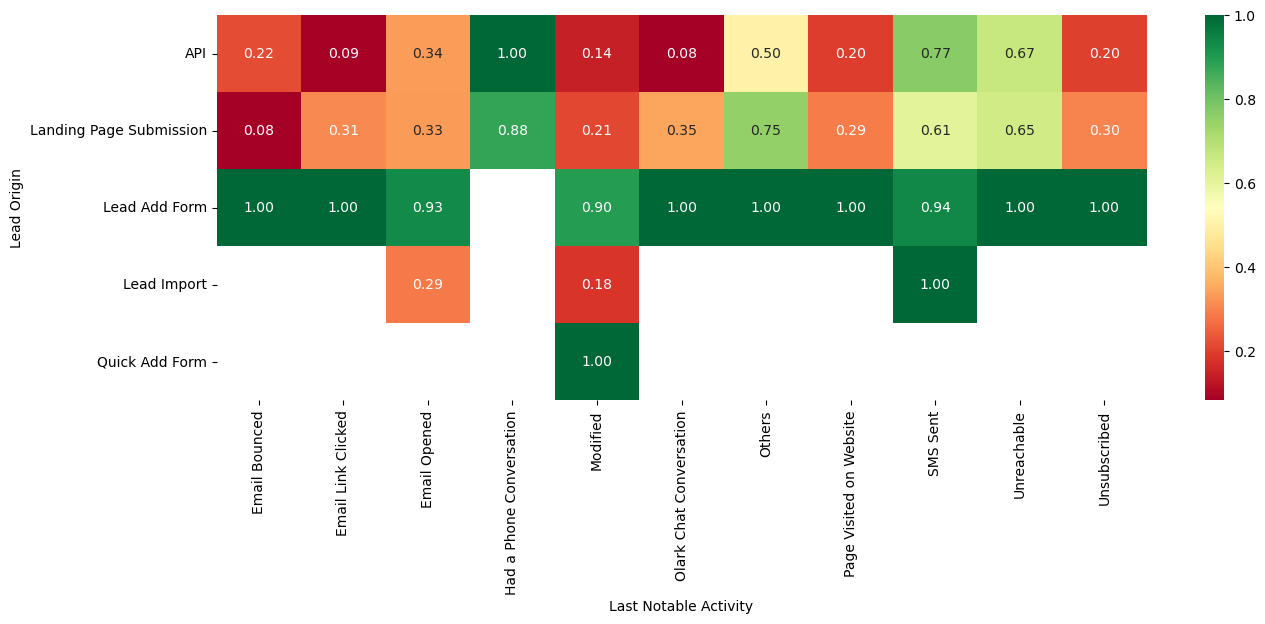

In [89]:
MultiVar_HeatMap(idx='Lead Origin',clm='Last Notable Activity')

- If the Last Notable activity is 'SMS Sent' then conversion chances are higher. 
- 'Lead Add Form' then conversion chances ahe higher.

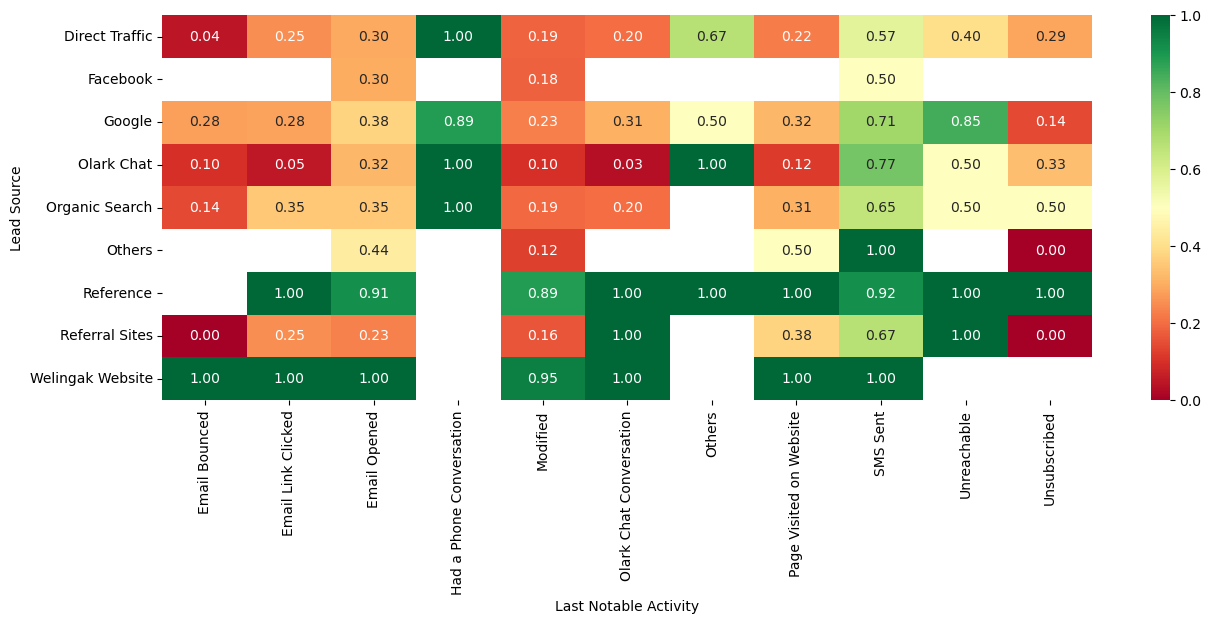

In [90]:
MultiVar_HeatMap(idx='Lead Source',clm='Last Notable Activity')

## 4. Data Preprocessing

### 4.1 One-Hot Encoding 

- let's preprocess the data for model building.
- we will first convert categorical columns into numerical using "one hot encoding"

In [91]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

  Specialization  Occupation         City  \
0    Unspecified  Unemployed  Unspecified   
1    Unspecified  Unemployed  Unspecified   
2       Business     Student       Mumbai   
3         Others  Unemployed       Mumbai   
4    Unspecified  Unemployed       Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [92]:
# firstly, we will map yes, no categories to 1,0 respectively.

df["Do Not Email"] = df["Do Not Email"].map({"Yes":1,"No":0})
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [93]:
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'Occupation', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [94]:
# Once we create dummy variables, we have to drop one column from each variable to avoid multi-collinearity, 
# and this can be done using, pd.get_dummies(df,drop_first=True), but we will manually drop
# columns to make our model more interpretable.

dummy_spec = pd.get_dummies(df['Specialization'],prefix='Specialization').drop('Specialization_Unspecified',axis=1)
dummy_occ = pd.get_dummies(df['Occupation'],prefix='Occupation').drop('Occupation_Unspecified',axis=1)
dummy_city = pd.get_dummies(df['City'],prefix='City').drop('City_Unspecified',axis=1)

dummy_origin = pd.get_dummies(df['Lead Origin'],prefix='Lead_Origin').drop('Lead_Origin_Quick Add Form',axis=1)
dummy_source = pd.get_dummies(df['Lead Source'],prefix='Lead_Source').drop('Lead_Source_Others',axis=1)

dummy_LNA = pd.get_dummies(df['Last Notable Activity'],
                           prefix='Last_Notable_Activity').drop('Last_Notable_Activity_Others',axis=1)

In [95]:
dummy = pd.get_dummies(df[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Do Not Email','A free copy of Mastering The Interview']],drop_first=True)

In [96]:
dummy_df = pd.concat([dummy,dummy_spec,dummy_occ,dummy_city,dummy_origin,dummy_source,dummy_LNA],axis=1)
dummy_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Do Not Email  A free copy of Mastering The Interview  \
0             0                                       0   
1             0                                       0   
2             0                                       1   
3             0                                       0   
4             0                                       0   

   Specialization_Business  Specialization_Management  Specialization_Others  \
0                        0                          0                      0   
1                        0                          0                      0   
2                        1                          0                      0   
3                        0                          0                      1   
4                        0                          0                      0   

   Occupation_Other  Occupation_Student  Occupation_Unemployed  \
0                 0                   0                      1   
1                 0                   0                      1   
2                 0                   1                      0   
3                 0                   0                      1   
4                 0                   0                      1   

   Occupation_Working Professional  City_Mumbai  City_Other Cities  \
0                                0            0                  0   
1                                0            0                  0   
2                                0            1                  0   
3                                0            1                  0   
4                                0            1                  0   

   City_Thane & Outskirts  Lead_Origin_API  \
0                       0                1   
1                       0                1   
2                       0                0   
3                       0                0   
4                       0                0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Direct Traffic  Lead_Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead_Source_Google  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead_Source_Reference  Lead_Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3       

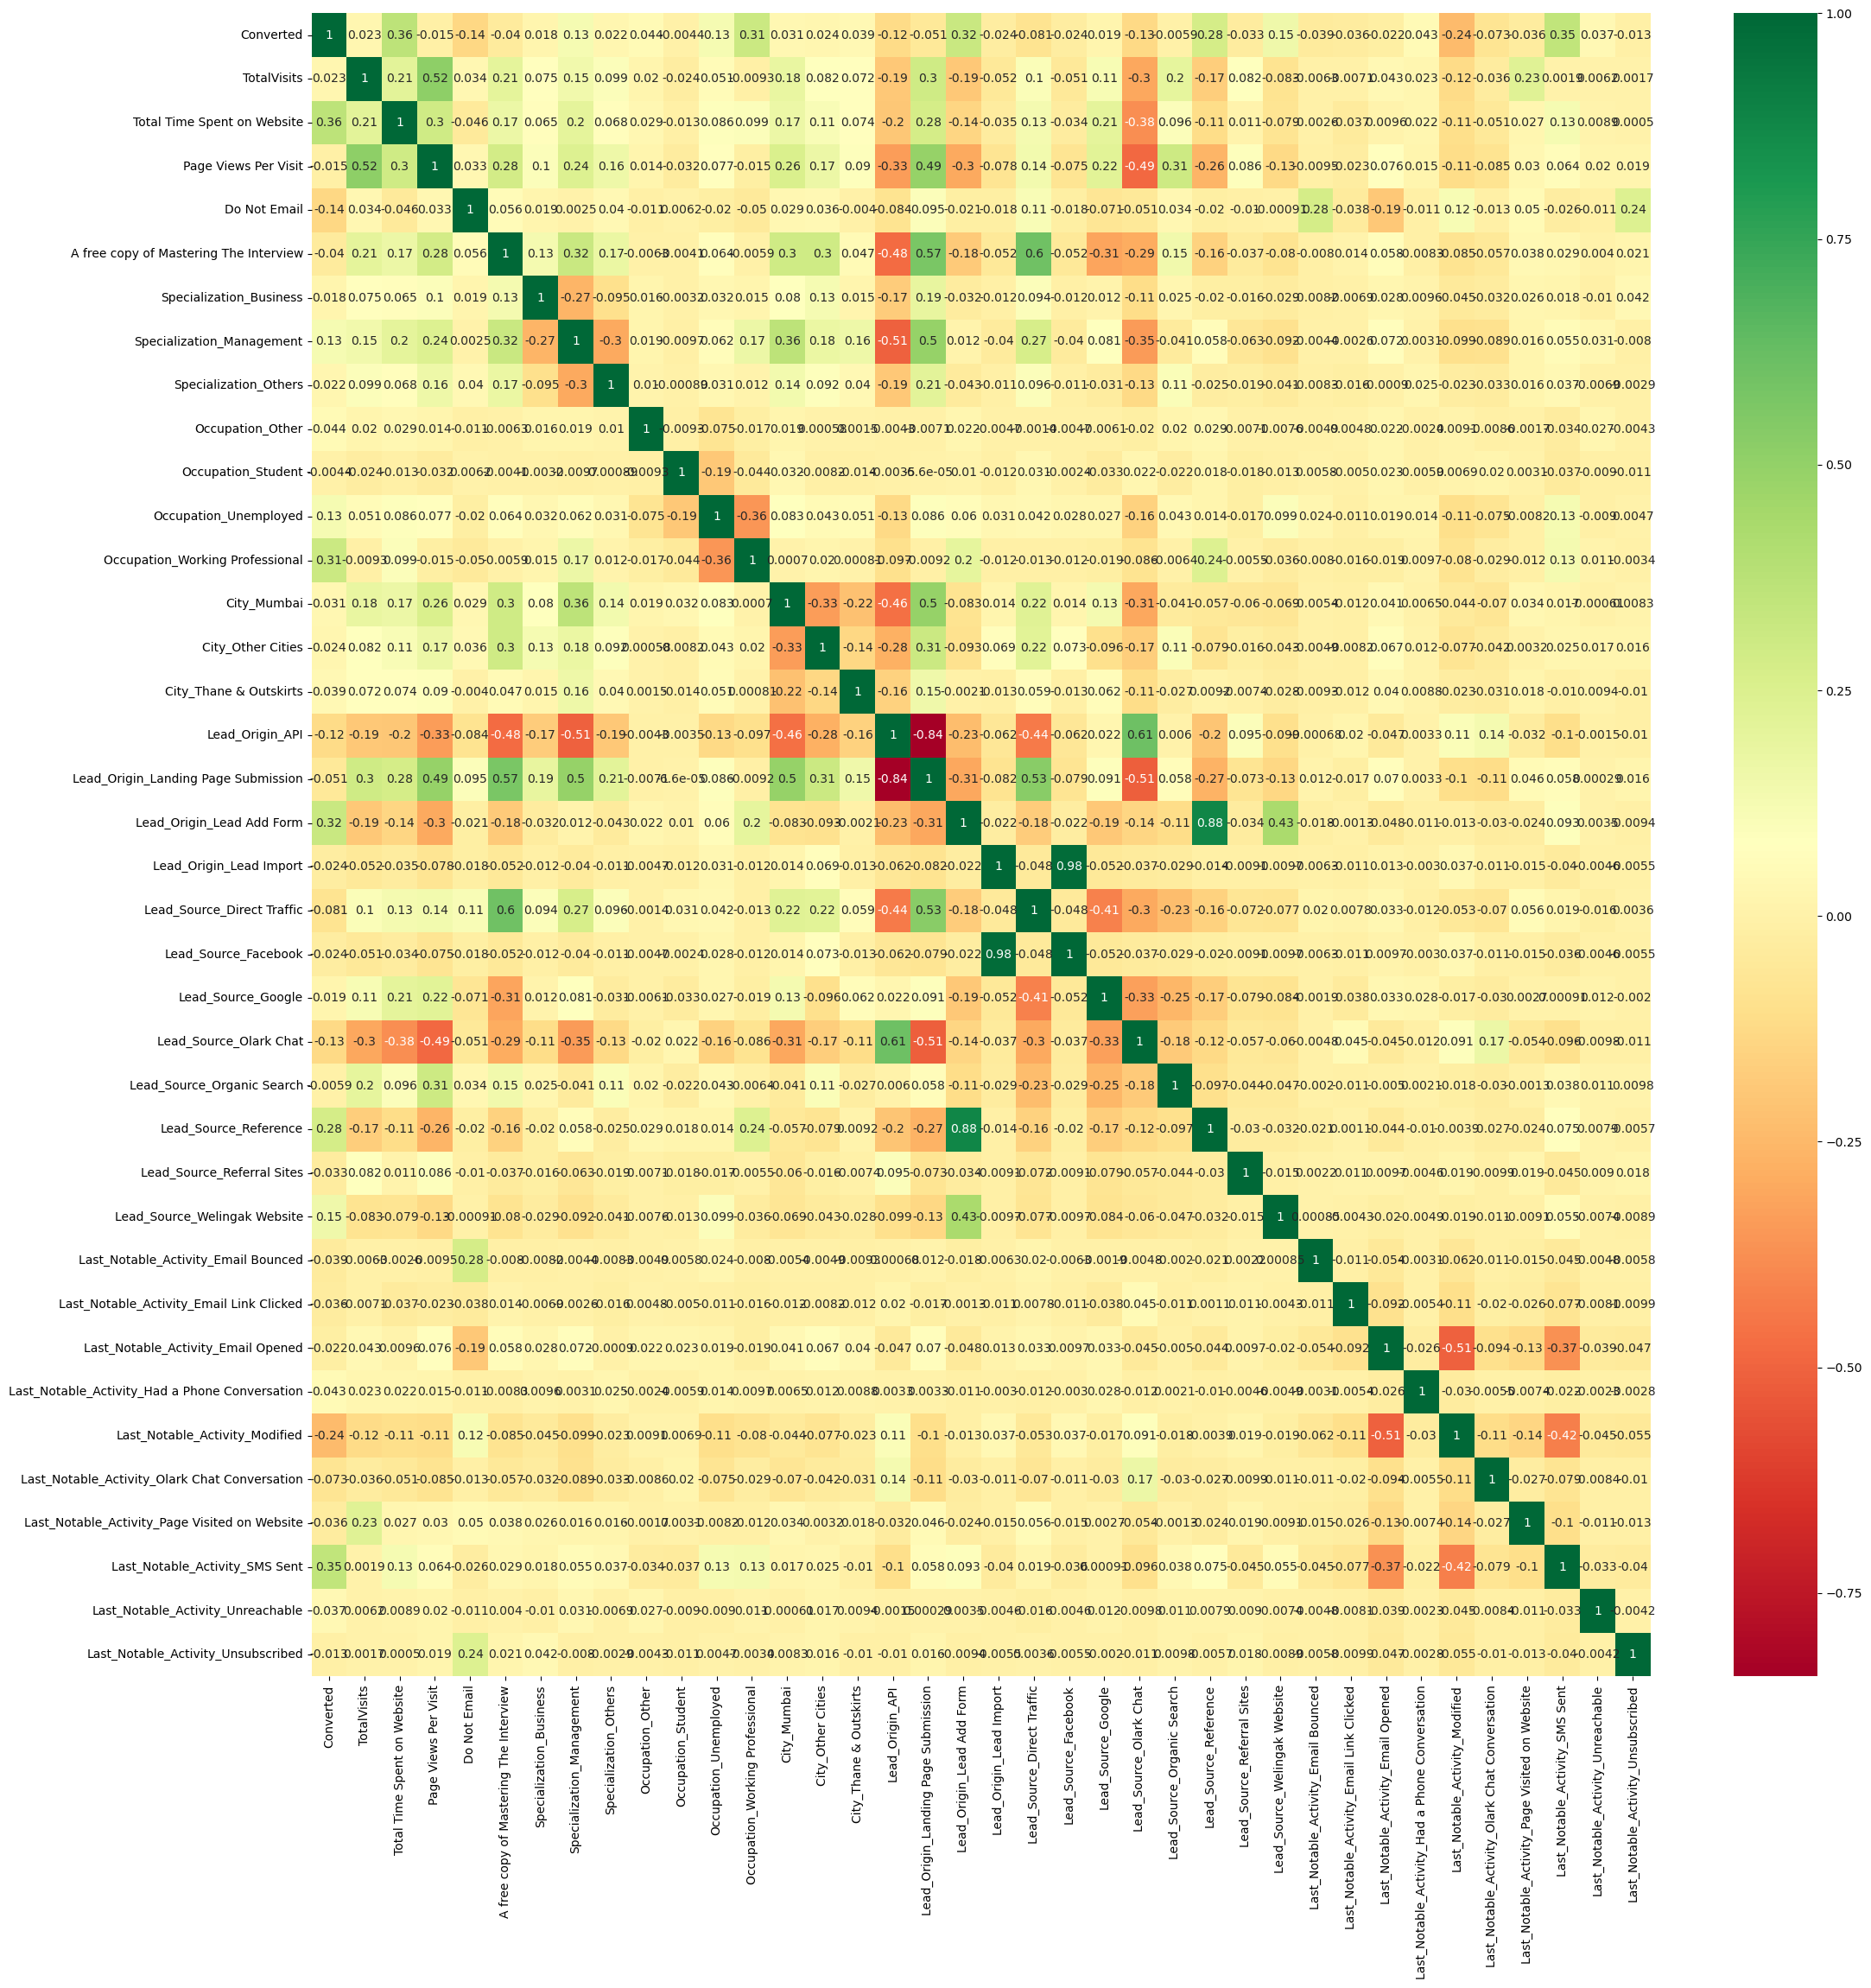

In [97]:
plt.figure(figsize=(25,25))
sns.heatmap(dummy_df.corr(),cmap="RdYlGn",annot=True)
plt.show()

Note: 
- highly correlated variables are with 0.7 and above correlation coefficient
- but instead of dropping them right now, we will use Recursive Feature Elimination at the time of model building.

### 4.2 Handling Outliers

In [98]:
dummy_df[numerical_cols].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
0%        0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

We can cap the "TotalVisits" & "Page Views Per Visit" columns at 99th percentile to get rid of outliers.

In [99]:
dummy_df = dummy_df[dummy_df.TotalVisits <= dummy_df.TotalVisits.quantile(0.99)]
dummy_df = dummy_df[dummy_df["Page Views Per Visit"] <= dummy_df["Page Views Per Visit"].quantile(0.99)]
dummy_df[numerical_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9090.000000                  9090.000000           9090.000000
mean      3.095710                   484.243784              2.232693
std       2.907166                   547.243973              1.901055
min       0.000000                     0.000000              0.000000
25%       0.000000                     9.000000              0.000000
50%       3.000000                   246.000000              2.000000
75%       4.000000                   930.000000              3.000000
max      17.000000                  2272.000000              9.000000

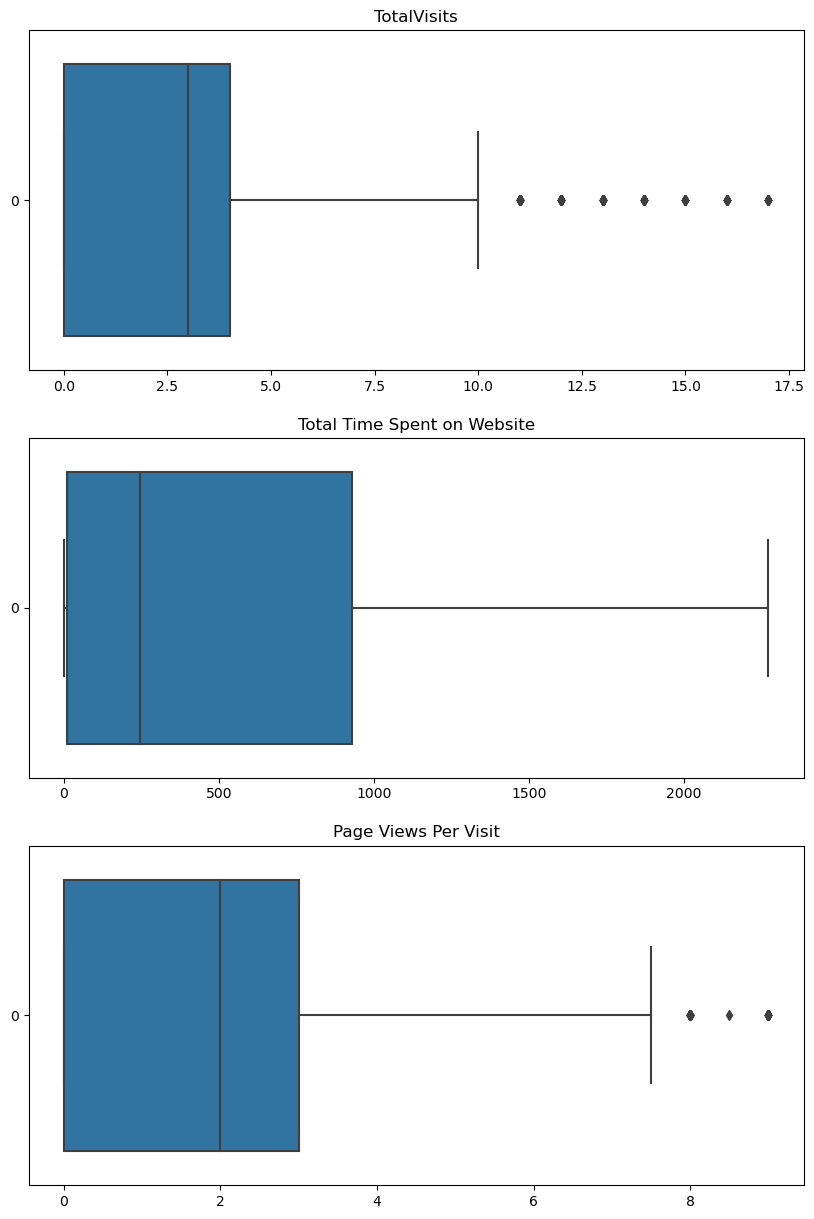

In [100]:
# lets plot the numerical columns to check if the outliers have been dealt correctly

plt.figure(figsize=(10,15))

for i,j in enumerate(numerical_cols,1):
    plt.subplot(3,1,i)
    sns.boxplot(dummy_df[j],orient="h")
    plt.xlabel(None)
    plt.title(j)
plt.show()

- we have dealt with the outliers

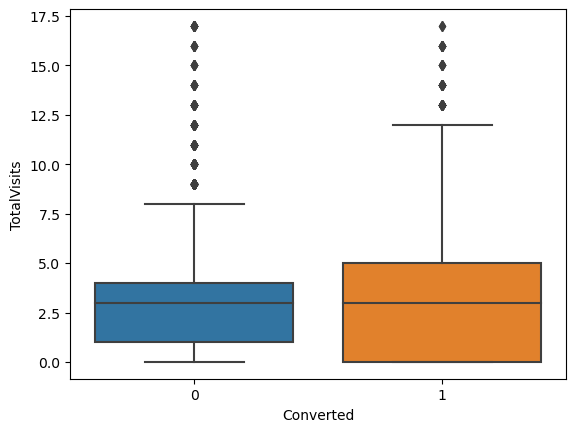

In [101]:
# let's check the numerical variables wrt target variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = dummy_df)
plt.show()

- Median is almost same for the both the categories, but we can roughly say that higher the number of total visits higher are the chances of conversion.

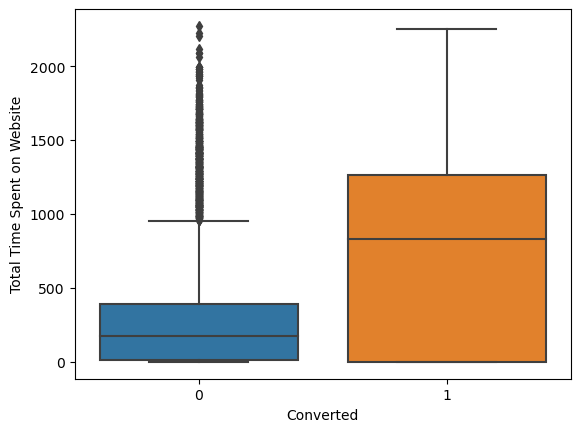

In [102]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = dummy_df)
plt.show()

- There is significant difference in the median value as well as distribution of converted and not-converted categories wrt total time spent on website.
- It is evident that higher the time spent higher is the chance of conversion.

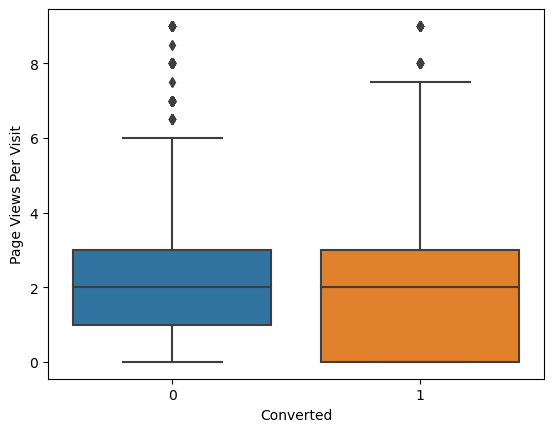

In [103]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = dummy_df)
plt.show()

- Median is almost same for the both the categories wrt page view, although converted class have higher variation in the data still we cannot strongly infer anything from it.

### 4.2. Splitting data into Train and Test Set

In [104]:
# seperating target variable from dataframe

y = dummy_df[["Converted"]]
X = dummy_df.drop("Converted",axis=1)

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [106]:
X_train.shape, X_test.shape

((6363, 37), (2727, 37))

### 4.3. Scaling the numerical data (Normalization)

In [107]:
# scaling numerical variables

scalar = MinMaxScaler()
# scalar = StandardScaler()

X_train[numerical_cols] = scalar.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scalar.transform(X_test[numerical_cols])

In [108]:
# checking if scaling has been performed correctly

X_train[numerical_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  6363.000000                  6363.000000           6363.000000
mean      0.182794                     0.212901              0.246494
std       0.170818                     0.239946              0.209168
min       0.000000                     0.000000              0.000000
25%       0.000000                     0.004842              0.000000
50%       0.176471                     0.108275              0.222222
75%       0.294118                     0.408891              0.333333
max       1.000000                     1.000000              1.000000

## 5. Model Building using StatsModels

#### Model 1 using all the variables

In [109]:
logreg_model_1 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial()).fit()
logreg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.4
Date:                Sat, 17 Feb 2024   Deviance:                       5006.9
Time:                        10:56:38   Pearson chi2:                 6.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4189
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             18.9299   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                        1.4924      0.306      4.884      0.000       0.893       2.091
Total Time Spent on Website                        4.4317      0.172     25.806      0.000       4.095       4.768
Page Views Per Visit                              -0.8733      0.281     -3.104      0.002      -1.425      -0.322
Do Not Email                                      -1.4009      0.195     -7.192      0.000      -1.783      -1.019
A free copy of Mastering The Interview            -0.2116      0.113     -1.867      0.062      -0.434       0.011
Specialization_Business                            0.3248      0.195      1.665      0.096      -0.058       0.707
Specialization_Management                          0.4318      0.159      2.713      0.007       0.120       0.744
Specialization_Others                              0.4438      0.193      2.299      0.022       0.065       0.822
Occupation_Other                                   2.6191      0.551      4.754      0.000       1.539       3.699
Occupation_Student                                 1.0835      0.243      4.455      0.000       0.607       1.560
Occupation_Unemployed                              1.0780      0.091     11.815      0.000       0.899       1.257
Occupation_Working Professional                    3.5141      0.205     17.158      0.000       3.113       3.915
City_Mumbai                                        0.5936      0.176      3.372      0.001       0.249       0.939
City_Other Cities                                  0.7615      0.185      4.114      0.000       0.399       1.124
City_Thane & Outskirts                             0.8070      0.200      4.040      0.000       0.415       1.198
Lead_Origin_API                                  -19.7864   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Origin_Landing Page Submission              -20.6290   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Origin_Lead Add Form                        -17.9269   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Origin_Lead Import                            2.1872   6.82e+04   3.21e-05      1.000   -1.34e+05    1.34e+05
Lead_Source_Direct Traffic                        -1.1561      0.715     -1.617      0.106      -2.557       0.245
Lead_Source_Facebook                             -23.5280   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_Google                                -0.8706      0.711     -1.224      0.221      -2.265       0.524
Lead_Source_Olark Chat                             0.0951      0.718      0.132      0.895   

#### As we can see, a lot of features are insignificant to the model, Let's drop some of the insignifact features using RFE and then fine tune the model

In [110]:
# feature selection using rfe

In [111]:
rfe = RFE(LogisticRegression(),n_features_to_select=25) # running RFE with 25 variables as output
rfe = rfe.fit(X_train,y_train)

In [112]:
# RFE Dataframe

RFE_df = pd.DataFrame()
RFE_df['features'] = X_train.columns
RFE_df['Support'] = rfe.support_
RFE_df['Rank'] = rfe.ranking_
RFE_df.sort_values('Rank',inplace=True)
RFE_df.reset_index(drop=True,inplace=True)
RFE_df

features  Support  Rank
0                                      TotalVisits     True     1
1                   Last_Notable_Activity_SMS Sent     True     1
2    Last_Notable_Activity_Olark Chat Conversation     True     1
3                   Last_Notable_Activity_Modified     True     1
4   Last_Notable_Activity_Had a Phone Conversation     True     1
5                     Lead_Source_Welingak Website     True     1
6                       Lead_Source_Referral Sites     True     1
7                       Lead_Source_Organic Search     True     1
8                               Lead_Source_Google     True     1
9                             Lead_Source_Facebook     True     1
10                      Lead_Source_Direct Traffic     True     1
11               Last_Notable_Activity_Unreachable     True     1
12                       Lead_Origin_Lead Add Form     True     1
13             Lead_Origin_Landing Page Submission     True     1
14              Last_Notable_Activity_Unsubscribed     True     1
15                               City_Other Cities     True     1
16                                     City_Mumbai     True     1
17                 Occupation_Working Professional     True     1
18                           Occupation_Unemployed     True     1
19                              Occupation_Student     True     1
20                                Occupation_Other     True     1
21                     Total Time Spent on Website     True     1
22                            Page Views Per Visit     True     1
23                          City_Thane & Outskirts     True     1
24                                    Do Not Email     True     1
25                         Lead_Origin_Lead Import    False     2
26   Last_Notable_Activity_Page Visited on Website    False     3
27                                 Lead_Origin_API    False     4
28                          Lead_Source_Olark Chat    False     5
29             Last_Notable_Activity_Email Bounced    False     6
30        Last_Notable_Activity_Email Link Clicked    False     7
31              Last_Notable_Activity_Email Opened    False     8
32                           Specialization_Others    False     9
33                       Specialization_Management    False    10
34                         Specialization_Business    False    11
35          A free copy of Mastering The Interview    False    12
36                           Lead_Source_Reference    False    13

In [113]:
# retained variables

col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'City_Mumbai', 'City_Other Cities', 'City_Thane & Outskirts',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Direct Traffic', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Referral Sites', 'Lead_Source_Welingak Website',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_Unsubscribed'],
      dtype='object')


##### Assessing the model with StatsModels

In [114]:
X = X_train[col]

logreg_model_2 = sm.GLM(y_train,sm.add_constant(X), family = sm.families.Binomial()).fit()
logreg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.7
Date:                Sat, 17 Feb 2024   Deviance:                       5027.5
Time:                        10:56:39   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4170
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1591      0.115    -18.851      0.000      -2.384      -1.935
TotalVisits                                        1.3081      0.294      4.454      0.000       0.732       1.884
Total Time Spent on Website                        4.4533      0.171     26.042      0.000       4.118       4.788
Page Views Per Visit                              -0.7216      0.277     -2.610      0.009      -1.264      -0.180
Do Not Email                                      -1.4357      0.186     -7.726      0.000      -1.800      -1.071
Occupation_Other                                   2.6782      0.541      4.952      0.000       1.618       3.738
Occupation_Student                                 1.0826      0.240      4.514      0.000       0.613       1.553
Occupation_Unemployed                              1.1067      0.091     12.181      0.000       0.929       1.285
Occupation_Working Professional                    3.6144      0.200     18.043      0.000       3.222       4.007
City_Mumbai                                        0.8266      0.142      5.804      0.000       0.547       1.106
City_Other Cities                                  0.9898      0.152      6.501      0.000       0.691       1.288
City_Thane & Outskirts                             1.0512      0.172      6.125      0.000       0.715       1.388
Lead_Origin_Landing Page Submission               -0.7881      0.147     -5.355      0.000      -1.077      -0.500
Lead_Origin_Lead Add Form                          2.2335      0.209     10.700      0.000       1.824       2.643
Lead_Source_Direct Traffic                        -1.3529      0.158     -8.556      0.000      -1.663      -1.043
Lead_Source_Facebook                              -1.9265      0.541     -3.558      0.000      -2.988      -0.865
Lead_Source_Google                                -0.9374      0.142     -6.605      0.000      -1.216      -0.659
Lead_Source_Organic Search                        -1.2966      0.174     -7.451      0.000      -1.638      -0.956
Lead_Source_Referral Sites                        -0.9732      0.354     -2.750      0.006      -1.667      -0.279
Lead_Source_Welingak Website                       3.1808      1.032      3.081      0.002       1.157       5.204
Last_Notable_Activity_Had a Phone Conversation    22.6758   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
Last_Notable_Activity_Modified                    -0.5405      0.087     -6.196      0.000      -0.711      -0.370
Last_Notable_Activity_Olark Chat Conversation     -1.3034      0.336     -3.876      0.000      -1.963      -0.644
Last_Notable_Activity_SMS Sent                     1.5122      0.090     16.783      0.000   

In [115]:
def print_VIF_df(X):
    VIF = pd.DataFrame()
    VIF['Features'] = X.columns
    VIF['VIF'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    VIF = VIF.sort_values(by = "VIF", ascending = False)
    VIF.reset_index(drop=True,inplace=True)
    return VIF

print_VIF_df(X)

Features   VIF
0              Lead_Origin_Landing Page Submission  9.41
1                             Page Views Per Visit  6.76
2                                      City_Mumbai  5.44
3                                      TotalVisits  4.87
4                       Lead_Source_Direct Traffic  4.61
5                               Lead_Source_Google  4.21
6                                City_Other Cities  3.12
7                            Occupation_Unemployed  2.93
8                       Lead_Source_Organic Search  2.69
9                      Total Time Spent on Website  2.31
10                          City_Thane & Outskirts  1.92
11                       Lead_Origin_Lead Add Form  1.81
12                  Last_Notable_Activity_Modified  1.66
13                  Last_Notable_Activity_SMS Sent  1.62
14                 Occupation_Working Professional  1.41
15                    Lead_Source_Welingak Website  1.30
16                                    Do Not Email  1.22
17                      Lead_Source_Referral Sites  1.13
18                            Lead_Source_Facebook  1.09
19              Last_Notable_Activity_Unsubscribed  1.09
20                              Occupation_Student  1.06
21                                Occupation_Other  1.02
22   Last_Notable_Activity_Olark Chat Conversation  1.02
23  Last_Notable_Activity_Had a Phone Conversation  1.01
24               Last_Notable_Activity_Unreachable  1.01

#### 'Last_Notable_Activity_Had a Phone Conversation' has highest p-value > 0.05, which makes it insignificant. Let's drop it

In [116]:
col = col.drop("Last_Notable_Activity_Had a Phone Conversation")
X = X_train[col]

logreg_model_3 = sm.GLM(y_train,sm.add_constant(X), family = sm.families.Binomial()).fit()
print(logreg_model_3.summary())

print_VIF_df(X)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.7
Date:                Sat, 17 Feb 2024   Deviance:                       5039.5
Time:                        10:56:39   Pearson chi2:                 6.64e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4159
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Features   VIF
0             Lead_Origin_Landing Page Submission  9.40
1                            Page Views Per Visit  6.76
2                                     City_Mumbai  5.44
3                                     TotalVisits  4.86
4                      Lead_Source_Direct Traffic  4.61
5                              Lead_Source_Google  4.21
6                               City_Other Cities  3.12
7                           Occupation_Unemployed  2.92
8                      Lead_Source_Organic Search  2.69
9                     Total Time Spent on Website  2.31
10                         City_Thane & Outskirts  1.92
11                      Lead_Origin_Lead Add Form  1.81
12                 Last_Notable_Activity_Modified  1.65
13                 Last_Notable_Activity_SMS Sent  1.62
14                Occupation_Working Professional  1.41
15                   Lead_Source_Welingak Website  1.30
16                                   Do Not Email  1.22
17                     Lead_Source_Referral Sites  1.13
18                           Lead_Source_Facebook  1.09
19             Last_Notable_Activity_Unsubscribed  1.09
20                             Occupation_Student  1.06
21                               Occupation_Other  1.02
22  Last_Notable_Activity_Olark Chat Conversation  1.02
23              Last_Notable_Activity_Unreachable  1.01

#### The model seems stable as the coefficients are not flipping signs.
#### Although all the variables seems significant based on p value < 0.05, 'Lead_Origin_Landing Page Submission' variable has VIF > 5 , Let's drop it.

In [117]:
col = col.drop("Lead_Origin_Landing Page Submission")
X = X_train[col]

logreg_model_4 = sm.GLM(y_train,sm.add_constant(X), family = sm.families.Binomial()).fit()
print(logreg_model_4.summary())

print_VIF_df(X)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.6
Date:                Sat, 17 Feb 2024   Deviance:                       5069.1
Time:                        10:56:39   Pearson chi2:                 6.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Features   VIF
0                            Page Views Per Visit  6.64
1                                     TotalVisits  4.85
2                              Lead_Source_Google  4.03
3                      Lead_Source_Direct Traffic  3.93
4                                     City_Mumbai  2.97
5                           Occupation_Unemployed  2.89
6                      Lead_Source_Organic Search  2.61
7                     Total Time Spent on Website  2.30
8                               City_Other Cities  1.98
9                       Lead_Origin_Lead Add Form  1.76
10                 Last_Notable_Activity_Modified  1.65
11                 Last_Notable_Activity_SMS Sent  1.61
12                         City_Thane & Outskirts  1.42
13                Occupation_Working Professional  1.41
14                   Lead_Source_Welingak Website  1.30
15                                   Do Not Email  1.22
16                     Lead_Source_Referral Sites  1.13
17             Last_Notable_Activity_Unsubscribed  1.09
18                             Occupation_Student  1.06
19                           Lead_Source_Facebook  1.06
20                               Occupation_Other  1.02
21  Last_Notable_Activity_Olark Chat Conversation  1.02
22              Last_Notable_Activity_Unreachable  1.01

#### The model seems stable as the coefficients are not flipping signs.
#### Although all the variables seems significant based on p value < 0.05, 'Page Views Per Visit' variable has VIF > 5 , Let's drop it.

In [118]:
col = col.drop("Page Views Per Visit")
X = X_train[col]

logreg_model_5 = sm.GLM(y_train,sm.add_constant(X), family = sm.families.Binomial()).fit()
print(logreg_model_5.summary())

print_VIF_df(X)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Sat, 17 Feb 2024   Deviance:                       5080.1
Time:                        10:56:39   Pearson chi2:                 6.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Features   VIF
0                                     TotalVisits  3.76
1                      Lead_Source_Direct Traffic  3.65
2                              Lead_Source_Google  3.53
3                           Occupation_Unemployed  2.89
4                                     City_Mumbai  2.88
5                     Total Time Spent on Website  2.30
6                      Lead_Source_Organic Search  2.24
7                               City_Other Cities  1.94
8                       Lead_Origin_Lead Add Form  1.76
9                  Last_Notable_Activity_Modified  1.65
10                 Last_Notable_Activity_SMS Sent  1.60
11                Occupation_Working Professional  1.41
12                         City_Thane & Outskirts  1.40
13                   Lead_Source_Welingak Website  1.30
14                                   Do Not Email  1.22
15             Last_Notable_Activity_Unsubscribed  1.09
16                     Lead_Source_Referral Sites  1.09
17                             Occupation_Student  1.06
18                           Lead_Source_Facebook  1.06
19                               Occupation_Other  1.02
20  Last_Notable_Activity_Olark Chat Conversation  1.02
21              Last_Notable_Activity_Unreachable  1.01

In [119]:
# print_VIF_df(X)
pd.DataFrame(logreg_model_5.params)

0
const                                         -2.094899
TotalVisits                                    0.962941
Total Time Spent on Website                    4.484820
Do Not Email                                  -1.458675
Occupation_Other                               2.764631
Occupation_Student                             1.105638
Occupation_Unemployed                          1.137331
Occupation_Working Professional                3.621710
City_Mumbai                                    0.256931
City_Other Cities                              0.431175
City_Thane & Outskirts                         0.513857
Lead_Origin_Lead Add Form                      2.352516
Lead_Source_Direct Traffic                    -1.797766
Lead_Source_Facebook                          -1.522164
Lead_Source_Google                            -1.257957
Lead_Source_Organic Search                    -1.675021
Lead_Source_Referral Sites                    -1.229667
Lead_Source_Welingak Website                   3.039217
Last_Notable_Activity_Modified                -0.547565
Last_Notable_Activity_Olark Chat Conversation -1.254379
Last_Notable_Activity_SMS Sent                 1.450356
Last_Notable_Activity_Unreachable              2.037565
Last_Notable_Activity_Unsubscribed             1.355158

#### - As all p values are within 0.05, it means all the variables are relevant, and all vif's are within 5 which means there no multicollinearity present. 

#### - let's predict the target variable and then assess the model

## 6. Target prediction and Model Evaluation

### 6.1 Predicting target variable

In [120]:
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = logreg_model_5.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.08057406, 0.01628423, 0.26804773, ..., 0.23416704, 0.67749008,
       0.15533438])

In [121]:
y_train_pred_df = pd.DataFrame({'Converted':y_train.values.reshape(-1), 'Converted_Prob':y_train_pred})
y_train_pred_df['ID'] = y_train.index
y_train_pred_df.head()

Converted  Converted_Prob    ID
0          0        0.080574   302
1          0        0.016284  6087
2          0        0.268048  1033
3          0        0.186634  7656
4          1        0.781329  3241

In [122]:
y_train_pred_df['predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

Converted  Converted_Prob    ID  predicted
0          0        0.080574   302          0
1          0        0.016284  6087          0
2          0        0.268048  1033          0
3          0        0.186634  7656          0
4          1        0.781329  3241          1

In [123]:
# Confusion matrix 

confusion = confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted)
print(confusion)

[[3479  456]
 [ 696 1732]]


In [124]:
# Predicted-->    not_converted    converted
# Actual
# not_converted          3479           456
# converted              696           1732

In [125]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted)*100)

81.8953323903819


In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
# Out of all Actual True values, how many were we able to correctly predict as True?  

TP / float(TP+FN)

0.71334431630972

In [128]:
# Let us calculate specificity
# Out of all Actual False values, how many were we able to correctly predict as False?

TN / float(TN+FP)

0.8841168996188056

In [129]:
# false postive rate - predicting Converted when prospect is actually not converted

print(FP/ float(TN+FP))

0.11588310038119441


In [130]:
# positive predictive values - Probability of predicted True being actual True.

print (TP / float(TP+FP))

0.7915904936014625


In [131]:
# Negative predictive value  - Probability of predicted False being actual False.

print (TN / float(TN+ FN))

0.8332934131736527


### 6.2 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

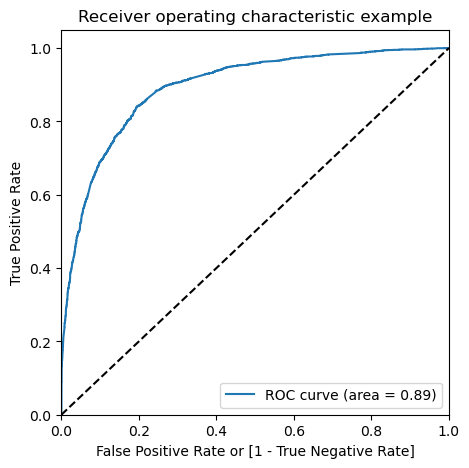

In [133]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, drop_intermediate = False)
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

### 6.3 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.080574   302          0    1    0    0    0    0    0   
1          0        0.016284  6087          0    1    0    0    0    0    0   
2          0        0.268048  1033          0    1    1    1    0    0    0   
3          0        0.186634  7656          0    1    1    0    0    0    0   
4          1        0.781329  3241          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    0    0

In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.629577  0.969110  0.420076
0.2   0.2  0.771963  0.911038  0.686150
0.3   0.3  0.813138  0.849671  0.790597
0.4   0.4  0.818639  0.777183  0.844219
0.5   0.5  0.818953  0.713344  0.884117
0.6   0.6  0.814396  0.647858  0.917154
0.7   0.7  0.793179  0.542422  0.947903
0.8   0.8  0.763791  0.433690  0.967471
0.9   0.9  0.723401  0.297364  0.986277


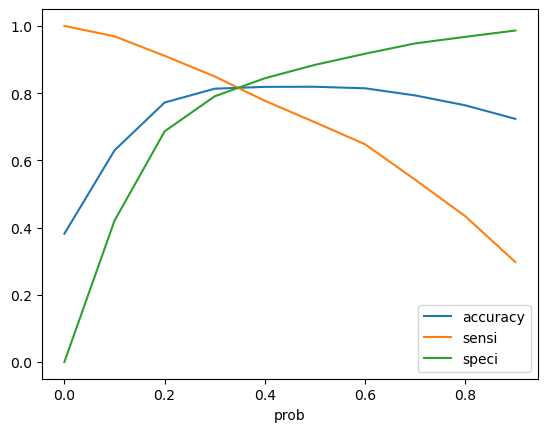

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a intermediate cutoff probability.

In [137]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

y_train_pred_df.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.080574   302          0    1    0    0    0    0    0   
1          0        0.016284  6087          0    1    0    0    0    0    0   
2          0        0.268048  1033          0    1    1    1    0    0    0   
3          0        0.186634  7656          0    1    1    0    0    0    0   
4          1        0.781329  3241          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    1    1    0    0                1

In [138]:
accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.8173817381738174

In [139]:
confusion2 = confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
confusion2

array([[3244,  691],
       [ 471, 1957]], dtype=int64)

In [140]:
# | TN  FP |
# | FN  TP |

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.806013179571664

In [143]:
# Let's calculate specificity
TN / float(TN+FP)

0.8243964421855147

In [144]:
# Calculate false postive rate - predicting Converted when customer has not converted
print(FP/ float(TN+FP))

0.1756035578144854


In [145]:
# Positive predictive value - Precision
print (TP / float(TP+FP))

0.7390483383685801


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8732166890982503


### 6.4 Precision and Recall Trade-off

In [147]:
precision_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.7390483383685801

In [148]:
recall_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.806013179571664

- As we can see that the precision is at 74%, i.e the model is able to predict 74% of predicted True values correctly. for eg. Out of 100 predicted true by model, 74 are actual true.
- As per the CEO, the conversion rate should be around 80%. So, we need to adjust the cut-off such that the precision comes around 80%.
- That means, even if we only focus on the leads which have been predicted as True by the model, then also we will surely get around 80% conversion probability.

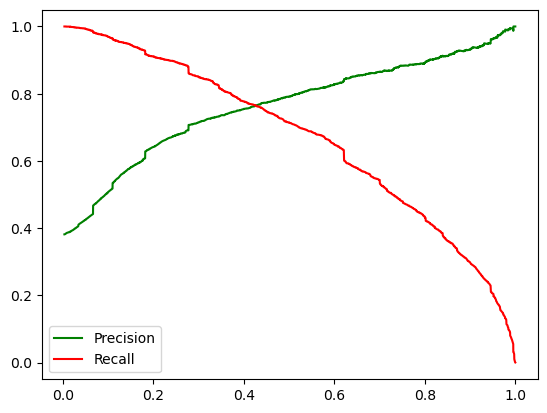

In [149]:
# Precision recall tradeoff

p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['Precision',"Recall"])
plt.show()

From precision recall graph, we can take 0.42 as optimal final probability cutoff.  but as our target is to predict around 80% leads which are being successfully converted, we can even choose cut-off higher than 0.42 to increase the precision of our model but at the cost of increased negative predictive values. Lets choose cutoff as 0.47

In [150]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.47 else 0)

y_train_pred_df.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.080574   302          0    1    0    0    0    0    0   
1          0        0.016284  6087          0    1    0    0    0    0    0   
2          0        0.268048  1033          0    1    1    1    0    0    0   
3          0        0.186634  7656          0    1    1    0    0    0    0   
4          1        0.781329  3241          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    1    1    0    0                1

In [151]:
accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.8200534339148201

In [152]:
confusion3 = confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [153]:
confusion3

array([[3433,  502],
       [ 643, 1785]], dtype=int64)

In [154]:
precision_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.7804984696108439

In [155]:
recall_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.735172981878089

### - As we can see, we are getting around 78% precision and sensitivity is around 74%.

### - So, if we completely depend on the predictions of our model, then we can still achieve around 74% of current the revenue, while only attending or catering to 2290 leads which accounts to around 36% of the leads.



### Making predictions on the test set

In [156]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Do Not Email  \
6906     0.235294                     0.673415             0   
1873     0.117647                     0.081866             0   
771      0.411765                     0.021567             0   
4495     0.235294                     0.063380             0   
9061     0.117647                     0.786972             0   

      Occupation_Other  Occupation_Student  Occupation_Unemployed  \
6906                 0                   0                      1   
1873                 0                   0                      1   
771                  0                   0                      1   
4495                 0                   0                      1   
9061                 0                   0                      0   

      Occupation_Working Professional  City_Mumbai  City_Other Cities  \
6906                                0            1                  0   
1873                                0            1                  0   
771                                 0            0                  0   
4495                                0            1                  0   
9061                                0            1                  0   

      City_Thane & Outskirts  Lead_Origin_Lead Add Form  \
6906                       0                          0   
1873                       0                          0   
771                        0                          0   
4495                       0                          0   
9061                       0                          0   

      Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
6906                           1                     0                   0   
1873                           0                     0                   1   
771                            0                     0                   1   
4495                           0                     0                   1   
9061                           1                     0                   0   

      Lead_Source_Organic Search  Lead_Source_Referral Sites  \
6906                           0                           0   
1873                           0                           0   
771                            0                           0   
4495                           0                           0   
9061                           0                           0   

      Lead_Source_Welingak Website  Last_Notable_Activity_Modified  \
6906                             0                               0   
1873                             0                               1   
771                              0                               0   
4495                             0                               0   
9061                             0                               1   

      Last_Notable_Activity_Olark Chat Conversation  \
6906                                              0   
1873                                              0   
771                                               0   
4495                                              0   
9061                                              0   

      Last_Notable_Activity_SMS Sent  Last_Notable_Activity_Unreachable  \
6906                               1                                  0   
1873                               0                                  0   
771                                0                                  0   
4495                               0                                  0   
9061                               0                                  0   

      Last_Notable_Activity_Unsubscribed  
6906                                   0  
1873                                   0  
771                                    0  
4495                                   0  
9061                                   0

In [157]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test dataset using final model number 5

In [158]:
y_test_pred = logreg_model_5.predict(X_test_sm)
y_test_pred

6906    0.900130
1873    0.116529
771     0.151576
4495    0.190345
9061    0.368051
          ...   
1939    0.237818
1540    0.250691
5198    0.067429
8660    0.066455
6219    0.416810
Length: 2727, dtype: float64

In [159]:
y_test_pred_df = pd.DataFrame({'Converted':y_test.values.reshape(-1), 'Converted_Prob':y_test_pred.values})
y_test_pred_df['ID'] = y_test.index
y_test_pred_df = y_test_pred_df.reindex(['ID','Converted','Converted_Prob'],axis=1)
y_test_pred_df.head()

ID  Converted  Converted_Prob
0  6906          1        0.900130
1  1873          0        0.116529
2   771          0        0.151576
3  4495          0        0.190345
4  9061          1        0.368051

In [160]:
# as we want higher precision, we will use cut-off of 0.47 as earlier.

y_test_pred_df['final_predicted'] = y_test_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.47 else 0)

In [161]:
y_test_pred_df.head()

ID  Converted  Converted_Prob  final_predicted
0  6906          1        0.900130                1
1  1873          0        0.116529                0
2   771          0        0.151576                0
3  4495          0        0.190345                0
4  9061          1        0.368051                0

In [162]:
accuracy_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.806013934726806

In [163]:
confusion2 = confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.final_predicted )
confusion2

array([[1435,  225],
       [ 304,  763]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
precision_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.7722672064777328

In [166]:
recall_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.7150890346766635

In [167]:
y_test_pred_df["Lead_Score"] = round(y_test_pred_df.Converted_Prob,2)*100
y_test_pred_df.head(10)

ID  Converted  Converted_Prob  final_predicted  Lead_Score
0  6906          1        0.900130                1        90.0
1  1873          0        0.116529                0        12.0
2   771          0        0.151576                0        15.0
3  4495          0        0.190345                0        19.0
4  9061          1        0.368051                0        37.0
5  4929          1        0.593503                1        59.0
6  2308          0        0.035816                0         4.0
7  1034          0        0.067725                0         7.0
8  9033          0        0.147232                0        15.0
9  7008          1        0.923184                1        92.0

In [168]:
# Test Data

# [1435,  225]
# [ 304,  763]

# Total Leads - 2727

# Total Predicted True - 225+763 = 988

## Conclusion (based on test data) :

- we were able to achieve around 77% precision and around 72% sensitivity on test data set.
- At the cost of 28% less business, we can reduce the work load by almost 64%.

## Let's try to improve the results by Ensembling Logistic Regression, Random Forest & Support Vector Machine Models.

## Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [172]:
df = df[df.TotalVisits <= df.TotalVisits.quantile(0.99)]
df = df[df["Page Views Per Visit"] <= df["Page Views Per Visit"].quantile(0.99)]
df[numerical_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9090.000000                  9090.000000           9090.000000
mean      3.095710                   484.243784              2.232693
std       2.907166                   547.243973              1.901055
min       0.000000                     0.000000              0.000000
25%       0.000000                     9.000000              0.000000
50%       3.000000                   246.000000              2.000000
75%       4.000000                   930.000000              3.000000
max      17.000000                  2272.000000              9.000000

In [173]:
y = df[["Converted"]].values.reshape(-1)
X = df.drop("Converted",axis=1)

In [174]:
le = LabelEncoder()

In [175]:
for i in X.select_dtypes('object').columns:
    X[i] = le.fit_transform(X[i])

In [176]:
X_train_rf,X_test_rf,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [180]:
parameters = {'max_depth':[3,4,5,6],
             'min_samples_split':[40,60,80,100],
             'min_samples_leaf':[20,30]}

GS = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                 param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=4,verbose=1)

GS.fit(X_train_rf,y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [40, 60, 80, 100]},
             scoring='accuracy', verbose=1)

In [181]:
rf_df = pd.DataFrame(GS.cv_results_)
rf_df.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
26       0.406355  2.488975e-02         0.023432        0.007811   
27       0.367506  3.220469e-02         0.039053        0.013528   
25       0.367202  2.359933e-02         0.035246        0.006709   
24       0.344070  4.915125e-07         0.019527        0.006764   
17       0.316405  6.724607e-03         0.027337        0.006765   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
26               6                     20                      80   
27               6                     20                     100   
25               6                     20                      60   
24               6                     20                      40   
17               5                     20                      60   

                                                                params  \
26   {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 80}   
27  {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 100}   
25   {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 60}   
24   {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 40}   
17   {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 60}   

    split0_test_score  split1_test_score  split2_test_score  \
26           0.841609           0.818982           0.846637   
27           0.843495           0.815839           0.847894   
25           0.842866           0.816468           0.845380   
24           0.843495           0.818353           0.840352   
17           0.841609           0.815839           0.846009   

    split3_test_score  mean_test_score  std_test_score  rank_test_score  
26           0.826415         0.833411        0.011172                1  
27           0.826415         0.833411        0.012934                2  
25           0.823270         0.831996        0.012395                3  
24           0.825157         0.831839        0.010426                4  
17           0.822642         0.831525        0.012614                5

In [182]:
best_dt = GS.best_estimator_
best_dt

RandomForestClassifier(max_depth=6, min_samples_leaf=20, min_samples_split=80,
                       random_state=100)

In [207]:
y_train_pred_rf = best_dt.predict(X_train_rf)
y_test_pred_rf = best_dt.predict(X_test_rf)

In [208]:
# train data

accuracy_score(y_train,y_train_pred_rf),precision_score(y_train,y_train_pred_rf),recall_score(y_train,y_train_pred_rf)

(0.8371837183718371, 0.79, 0.7808896210873146)

In [209]:
# test data

accuracy_score(y_test,y_test_pred_rf),precision_score(y_test,y_test_pred_rf),recall_score(y_test,y_test_pred_rf)

(0.8287495416208287, 0.79296875, 0.761012183692596)

In [247]:
f1_rf = f1_score(y_test,y_test_pred_rf)
f1_rf

0.7766618842659014

In [260]:
rf_df_pred = pd.DataFrame(best_dt.predict_proba(X_test_rf))
rf_df_pred.columns = ['rf_0','rf_1']
rf_df_pred

rf_0      rf_1
0     0.261589  0.738411
1     0.855502  0.144498
2     0.850067  0.149933
3     0.847621  0.152379
4     0.554523  0.445477
...        ...       ...
2722  0.840035  0.159965
2723  0.474092  0.525908
2724  0.892547  0.107453
2725  0.925581  0.074419
2726  0.683687  0.316313

[2727 rows x 2 columns]

# SVM

In [214]:
from sklearn.svm import SVC,LinearSVC

In [194]:
# We will use same features as per previous LR model.

X_train = X_train[col]
X_test = X_test[col]

In [230]:
class_1 = SVC(random_state=100,probability=True)
class_1.fit(X_train,y_train)

SVC(probability=True, random_state=100)

In [231]:
y_train_pred_SVM1 = class_1.predict(X_train)
y_test_pred_SVM1 = class_1.predict(X_test)

In [232]:
class_1.predict_proba(X_train)

array([[0.90862169, 0.09137831],
       [0.85354524, 0.14645476],
       [0.76880382, 0.23119618],
       ...,
       [0.5       , 0.5       ],
       [0.2666676 , 0.7333324 ],
       [0.92364157, 0.07635843]])

In [233]:
# test scores

accuracy_score(y_test,y_test_pred_SVM1), precision_score(y_test,y_test_pred_SVM), recall_score(y_test,y_test_pred_SVM1)

(0.8188485515218189, 0.7924731182795699, 0.7235238987816307)

In [246]:
f1_svm1 = f1_score(y_test,y_test_pred_SVM1)
f1_svm1

0.7576054955839058

In [197]:
classifier = LinearSVC(random_state=100)
classifier.fit(X_train,y_train)

LinearSVC(random_state=100)

In [198]:
y_train_pred_SVM = classifier.predict(X_train)
y_test_pred_SVM = classifier.predict(X_test)

In [199]:
# Train data
# (accuracy,precision,recall)

accuracy_score(y_train,y_train_pred_SVM),precision_score(y_train,y_train_pred_SVM), recall_score(y_train,y_train_pred_SVM)

[[3488  447]
 [ 696 1732]]


(0.8203677510608204, 0.7948600275355667, 0.71334431630972)

In [227]:
# Test data
# (accuracy,precision,recall)

accuracy_score(y_test,y_test_pred_SVM), precision_score(y_test,y_test_pred_SVM), recall_score(y_test,y_test_pred_SVM)

(0.8082141547488082, 0.7924731182795699, 0.6907216494845361)

In [228]:
f1_score(y_test,y_test_pred_SVM1)

0.5750828990999527

In [263]:
svm1_df_pred = pd.DataFrame(class_1.predict_proba(X_test))
svm1_df_pred.columns = ['svm_0','svm_1']
svm1_df_pred.head()

svm_0     svm_1
0  0.106664  0.893336
1  0.911188  0.088812
2  0.913065  0.086935
3  0.888452  0.111548
4  0.810816  0.189184

## Logistic Regression SKlearn

In [201]:
LR = LogisticRegression(random_state=100)
LR.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [203]:
y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR = LR.predict(X_test)

In [205]:
accuracy_score(y_train,y_train_pred_LR),precision_score(y_train,y_train_pred_LR),recall_score(y_train,y_train_pred_LR)

(0.8197391167688197, 0.7931350114416476, 0.7137561779242174)

In [206]:
accuracy_score(y_test,y_test_pred_LR),precision_score(y_test,y_test_pred_LR),recall_score(y_test,y_test_pred_LR)

(0.8104143747708105, 0.7938034188034188, 0.6963448922211809)

In [245]:
f1_LR = f1_score(y_test,y_test_pred_LR)
f1_LR

0.7418871692461309

# Ensembling

In [248]:
f1_LR_sm = f1_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)
f1_LR_sm

0.7425790754257908

In [249]:
total = f1_LR_sm+f1_rf+f1_svm1

In [250]:
weight_lr_sm = f1_LR_sm/total
weight_rf = f1_rf/total
weight_svm1 = f1_svm1/total

In [251]:
weight_lr_sm,weight_rf,weight_svm1

(0.3261436772362, 0.34111298215403435, 0.3327433406097656)

In [278]:
LR_df_pred = pd.DataFrame(logreg_model_5.predict(sm.add_constant(X_test)))
LR_df_pred.columns = ['LR1']
LR_df_pred.reset_index(inplace=True)
LR_df_pred.head()

index       LR1
0   6906  0.900130
1   1873  0.116529
2    771  0.151576
3   4495  0.190345
4   9061  0.368051

In [279]:
LR_df_pred['svm1'] = svm1_df_pred.svm_1
LR_df_pred['rf1'] = rf_df_pred.rf_1

In [284]:
LR_df_pred['final_pred_prob'] = (weight_lr_sm*LR_df_pred.LR1+weight_rf*LR_df_pred.rf1+weight_svm1*LR_df_pred.svm1)

In [288]:
LR_df_pred['final_pred'] = LR_df_pred.final_pred_prob.apply(lambda x: 1 if x>0.45 else 0)

In [290]:
LR_df_pred.head()

index       LR1      svm1       rf1  final_pred_prob  final_pred
0   6906  0.900130  0.893336  0.738411         0.842705           1
1   1873  0.116529  0.088812  0.144498         0.116847           0
2    771  0.151576  0.086935  0.149933         0.129506           0
3   4495  0.190345  0.111548  0.152379         0.151175           0
4   9061  0.368051  0.189184  0.445477         0.334945           0

In [293]:
LR_df_pred['Actual'] = y_test_pred_df.Converted.values

In [302]:
accuracy_score(LR_df_pred.Actual,LR_df_pred.final_pred),precision_score(LR_df_pred.Actual,LR_df_pred.final_pred),recall_score(LR_df_pred.Actual,LR_df_pred.final_pred)

(0.8254492115878255, 0.7934458788480635, 0.7488284910965324)

In [317]:
from sklearn.ensemble import StackingClassifier

In [314]:
y = dummy_df[["Converted"]].values.reshape(-1)
X = dummy_df.drop("Converted",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

X_train = X_train[col]
X_test = X_test[col]

numerical_cols.remove('Page Views Per Visit')

scalar = MinMaxScaler()

X_train[numerical_cols] = scalar.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scalar.transform(X_test[numerical_cols])

In [324]:
estimators = [
    ('LR', LogisticRegression(random_state=100)),
    ("RF",RandomForestClassifier(max_depth=7, min_samples_leaf=10, 
                                 min_samples_split=20,
                                   random_state=100,max_features=22)),
    ('SVC',LinearSVC(random_state=100))
            ]

In [325]:
stack_classifier = StackingClassifier(estimators=estimators,
                              final_estimator=LogisticRegression(),cv=5)

In [326]:
stack_classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('LR', LogisticRegression(random_state=100)),
                               ('RF',
                                RandomForestClassifier(max_depth=7,
                                                       max_features=22,
                                                       min_samples_leaf=10,
                                                       min_samples_split=20,
                                                       random_state=100)),
                               ('SVC', LinearSVC(random_state=100))],
                   final_estimator=LogisticRegression())

In [327]:
y_train_pred = stack_classifier.predict(X_train)
y_test_pred = stack_classifier.predict(X_test)

In [328]:
accuracy_score(y_train,y_train_pred),precision_score(y_train,y_train_pred),recall_score(y_train,y_train_pred)

(0.8404840484048405, 0.8051835853131749, 0.7677100494233937)

In [329]:
accuracy_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred)

(0.8276494316098276, 0.8042813455657493, 0.739456419868791)

In [ ]:
cm5 = confusion_matrix(y_test,y_test_pred)
TP = cm5[1,1] 
TN = cm5[0,0]
FP = cm5[0,1]
FN = cm5[1,0]

# sensitivity
print("sensitivity :",TP / float(TP+FN))

# specificity
print("specificity :",TN / float(TN+FP))

In [ ]:
y_train_pred_proba = stack_classifier.predict_proba(X_train)
y_test_pred_proba = stack_classifier.predict_proba(X_test)

In [ ]:
train_pred_df = pd.DataFrame(y_train_pred_proba)
train_pred_df.columns = ['Prob0','Prob1']
train_pred_df['Predicted'] = y_train_pred
train_pred_df['Actual'] = y_train
train_pred_df.head(100)

## -Test Data - Individual Logistic Regression

#### Sensitivity
0.7150890346766635

#### Specificity
0.8644578313253012

#### Precision
0.7722672064777328

#### Recall
0.7150890346766635

## -Test Data - Ensemble

#### Sensitivity
0.7366447985004686

#### Specificity
0.8777108433734939

#### Precision
0.7947421638018201

#### Recall_score
0.7366447985004686

In [303]:
from sklearn.decomposition import PCA

In [304]:
pca_df = dummy_df.drop('Converted',axis=1)
y = dummy_df[["Converted"]].values.reshape(-1)

In [ ]:
# numerical_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [305]:
pca = PCA(22)

X_pca = pca.fit_transform(pca_df)

In [306]:
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,train_size=0.7,random_state=100)

In [307]:
logreg_model_pca = LogisticRegression(random_state=100)
logreg_model_pca.fit(X_train_pca,y_train)

LogisticRegression(random_state=100)

In [308]:
pca.explained_variance_ratio_

array([9.99952720e-01, 3.20145901e-05, 4.67161935e-06, 2.11427297e-06,
       1.12773045e-06, 1.08150677e-06, 9.29820064e-07, 7.90251944e-07,
       7.22516681e-07, 6.10773562e-07, 5.77179693e-07, 4.05073644e-07,
       3.18272524e-07, 2.84518441e-07, 2.77836070e-07, 2.46513201e-07,
       2.08814265e-07, 1.69908148e-07, 1.45051905e-07, 1.00270897e-07,
       7.97800011e-08, 7.14098552e-08])

In [309]:
y_train_pca_pred = logreg_model_pca.predict(X_train_pca)
y_test_pca_pred = logreg_model_pca.predict(X_test_pca)

In [310]:
accuracy_score(y_train,y_train_pca_pred),precision_score(y_train,y_train_pca_pred),recall_score(y_train,y_train_pca_pred)

(0.8173817381738174, 0.7887773722627737, 0.7121087314662273)

In [311]:
accuracy_score(y_test,y_test_pca_pred),precision_score(y_test,y_test_pca_pred),recall_score(y_test,y_test_pca_pred)

(0.8067473414008067, 0.7818371607515657, 0.7019681349578257)